## Business problem :

#### Customer Segmentation using Clustering techniques

Starbucks managemnent wants to know who are our best and worst customers and the effect of offers on them.

The following problems are expected to solve:

 - identify and group customers based on purchase behavior
 - identify customer group with high volume transactions
 - identify customer segment who are receptive to offers
 - identify less active customers

This analysis will help Starbucks to review the marketing strategies and providers a platform to come up with better offers for low volume customers and renewed strategy to retain the high volume and high frequent regular customers.

In [45]:
# Import libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from scipy import stats
from scipy import interpolate
import re
from sklearn.preprocessing import MultiLabelBinarizer

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

In [249]:
# Set image parameters for the notebook
plt.rcParams['figure.figsize'] = [5, 5]
sns.set_style("white")

# Set a color palette
starbucks_palette = ["#00704A", "#362415", "#eac784", "#604c4c"]

In [48]:
# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)


###  Non Standardized Data 
**Read Non-transformed merged data and prepare the data for Clustering . Remove columns like time, offer_id**

In [84]:
# Read clean data
starbucks = pd.read_csv('starbucks.csv',index_col='customer_id')

# Print
starbucks.head()

C:\Users\rsure\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  \
customer_id                                    
ffff82501cea40309d5fdd7edcca4a07           0   
fff8957ea8b240a6b5e634b6ee8eafcf           1   
fff7576017104bcc8677a8d63322b5e1           2   
fff3ba4757bd42088c044ca26d73817a           3   
fff29fb549084123bd046dbc5ceb4faa           4   

                                                          offer_id  \
customer_id                                                          
ffff82501cea40309d5fdd7edcca4a07  fafdcd668e3743c1bb461111dcafc2a4   
fff8957ea8b240a6b5e634b6ee8eafcf  fafdcd668e3743c1bb461111dcafc2a4   
fff7576017104bcc8677a8d63322b5e1  fafdcd668e3743c1bb461111dcafc2a4   
fff3ba4757bd42088c044ca26d73817a  fafdcd668e3743c1bb461111dcafc2a4   
fff29fb549084123bd046dbc5ceb4faa  fafdcd668e3743c1bb461111dcafc2a4   

                                  offer_received  received_time  offer_viewed  \
customer_id                                                                     
ffff82501cea40309d5fdd7edcca4a07               1            0.0           1.0   
fff8957ea8b240a6b5e634b6ee8eafcf               1          408.0           1.0   
fff7576017104bcc8677a8d63322b5e1               1          252.0           1.0   
fff3ba4757bd42088c044ca26d73817a               1            0.0           1.0   
fff29fb549084123bd046dbc5ceb4faa               1          168.0           1.0   

                                  viewed_time  time_viewed_received  \
customer_id                                                           
ffff82501cea40309d5fdd7edcca4a07          6.0                   6.0   
fff8957ea8b240a6b5e634b6ee8eafcf        432.0                  24.0   
fff7576017104bcc8677a8d63322b5e1        273.0                  21.0   
fff3ba4757bd42088c044ca26d73817a          6.0                   6.0   
fff29fb549084123bd046dbc5ceb4faa        168.0                   0.0   

                                  offer_completed  completed_time  \
customer_id                                                         
ffff82501cea40309d5fdd7edcca4a07              1.0            60.0   
fff8957ea8b240a6b5e634b6ee8eafcf              0.0             0.0   
fff7576017104bcc8677a8d63322b5e1              1.0           393.0   
fff3ba4757bd42088c044ca26d73817a              1.0             6.0   
fff29fb549084123bd046dbc5ceb4faa              1.0           168.0   

                                  time_completed_received  \
customer_id                                                 
ffff82501cea40309d5fdd7edcca4a07                     60.0   
fff8957ea8b240a6b5e634b6ee8eafcf                      0.0   
fff7576017104bcc8677a8d63322b5e1                    141.0   
fff3ba4757bd42088c044ca26d73817a                      6.0   
fff29fb549084123bd046dbc5ceb4faa                      0.0   

                                  time_completed_viewed  transaction  \
customer_id                                                            
ffff82501cea40309d5fdd7edcca4a07                   54.0          1.0   
fff8957ea8b240a6b5e634b6ee8eafcf                    0.0          0.0   
fff7576017104bcc8677a8d63322b5e1                  120.0          1.0   
fff3ba4757bd42088c044ca26d73817a                    0.0          1.0   
fff29fb549084123bd046dbc5ceb4faa                    0.0          1.0   

                                  transaction_time  amount  total_reward  age  \
customer_id                                                                     
ffff82501cea40309d5fdd7edcca4a07              60.0   16.06           2.0   45   
fff8957ea8b240a6b5e634b6ee8eafcf               0.0    0.00           0.0   71   
fff7576017104bcc8677a8d63322b5e1             393.0   14.00           4.0   71   
fff3ba4757bd42088c044ca26d73817a               6.0   20.98           2.0   69   
fff29fb549084123bd046dbc5ceb4faa             168.0   15.16           2.0   59   

                                   income  male  membership_days  \
customer_id                                                        
ffff82501cea40309d5

In [85]:
starbucks.shape

(147508, 29)

In [115]:
starbucks_drop = starbucks[starbucks['offer_received'] == 1]
starbucks_final = starbucks_drop.drop([ 'Unnamed: 0', 'offer_id','received_time','viewed_time','transaction_time','completed_time','time_viewed_received','time_completed_received','time_completed_viewed','email','offer_received','transaction'], axis = 1)
starbucks_final.dtypes

offer_viewed        float64
offer_completed     float64
amount              float64
total_reward        float64
age                   int64
income              float64
male                  int64
membership_days       int64
reward_each_time    float64
difficulty          float64
duration            float64
mobile              float64
social              float64
web                 float64
bogo                float64
discount            float64
informational       float64
dtype: object

In [124]:
starbucks_final.shape

(54453, 17)

In [118]:
starbucks_final.offer_completed.value_counts(),starbucks_final.bogo.value_counts(),starbucks_final.discount.value_counts(),starbucks_final.informational.value_counts(),starbucks_final.difficulty.value_counts()

(1.0    27513
 0.0    26940
 Name: offer_completed, dtype: int64,
 0.0    32694
 1.0    21759
 Name: bogo, dtype: int64,
 0.0    32637
 1.0    21816
 Name: discount, dtype: int64,
 0.0    43575
 1.0    10878
 Name: informational, dtype: int64,
 10.0    21814
 0.0     10878
 5.0     10824
 20.0     5511
 7.0      5426
 Name: difficulty, dtype: int64)

### Feature selector that Identifies and removes all low-variance features.
This is to identify highly correlated and less significant features . Identifying if we have anymore low-variance features using Variance Thershold Feature Selector and using Bernoulli variables to select the thershold.

We want to remove all features that has same value in more than 90% of the samples.

Since we have already taken care of high correlated features in our initial Data Modelling and Feature Selection, we do not have any low-variance features to remove.

In [131]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=(.9 * (1 - .9)))
new = selector.fit_transform(starbucks_final)
new_inverse =selector.inverse_transform(new)

In [132]:
new.shape

(54453, 17)

In [133]:
def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'black' if ( val > -0.75 and val < 0.75 )  else  'red'
    return 'color: %s' % color
starbucks_final.corr().style.applymap(color_correlation)

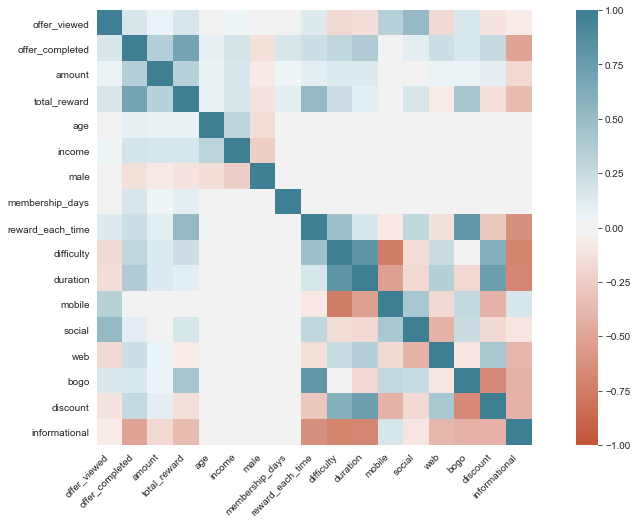

In [134]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(starbucks_final.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Feature scaling -  Standardized Data 
**Read standardized merged data and remove columns like time, offer_id**

In [135]:
# Read clean data
starbucks_std = pd.read_csv('starbucks_standarlized.csv',index_col='customer_id')

# Print
starbucks_std.head()

C:\Users\rsure\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  \
customer_id                                    
ffff82501cea40309d5fdd7edcca4a07           0   
fff8957ea8b240a6b5e634b6ee8eafcf           1   
fff7576017104bcc8677a8d63322b5e1           2   
fff3ba4757bd42088c044ca26d73817a           3   
fff29fb549084123bd046dbc5ceb4faa           4   

                                                          offer_id  \
customer_id                                                          
ffff82501cea40309d5fdd7edcca4a07  fafdcd668e3743c1bb461111dcafc2a4   
fff8957ea8b240a6b5e634b6ee8eafcf  fafdcd668e3743c1bb461111dcafc2a4   
fff7576017104bcc8677a8d63322b5e1  fafdcd668e3743c1bb461111dcafc2a4   
fff3ba4757bd42088c044ca26d73817a  fafdcd668e3743c1bb461111dcafc2a4   
fff29fb549084123bd046dbc5ceb4faa  fafdcd668e3743c1bb461111dcafc2a4   

                                  offer_received  offer_viewed  \
customer_id                                                      
ffff82501cea40309d5fdd7edcca4a07               1           1.0   
fff8957ea8b240a6b5e634b6ee8eafcf               1           1.0   
fff7576017104bcc8677a8d63322b5e1               1           1.0   
fff3ba4757bd42088c044ca26d73817a               1           1.0   
fff29fb549084123bd046dbc5ceb4faa               1           1.0   

                                  time_viewed_received  offer_completed  \
customer_id                                                               
ffff82501cea40309d5fdd7edcca4a07             -0.054744              1.0   
fff8957ea8b240a6b5e634b6ee8eafcf              0.612758              0.0   
fff7576017104bcc8677a8d63322b5e1              0.501507              1.0   
fff3ba4757bd42088c044ca26d73817a             -0.054744              1.0   
fff29fb549084123bd046dbc5ceb4faa             -0.277245              1.0   

                                  time_completed_received  \
customer_id                                                 
ffff82501cea40309d5fdd7edcca4a07                 1.297187   
fff8957ea8b240a6b5e634b6ee8eafcf                -0.316558   
fff7576017104bcc8677a8d63322b5e1                 3.475742   
fff3ba4757bd42088c044ca26d73817a                -0.155183   
fff29fb549084123bd046dbc5ceb4faa                -0.316558   

                                  time_completed_viewed  transaction  \
customer_id                                                            
ffff82501cea40309d5fdd7edcca4a07               1.610609          1.0   
fff8957ea8b240a6b5e634b6ee8eafcf              -0.180830          0.0   
fff7576017104bcc8677a8d63322b5e1               3.800146          1.0   
fff3ba4757bd42088c044ca26d73817a              -0.180830          1.0   
fff29fb549084123bd046dbc5ceb4faa              -0.180830          1.0   

                                    amount  total_reward       age    income  \
customer_id                                                                    
ffff82501cea40309d5fdd7edcca4a07  0.130679      0.326225 -0.430855  0.013855   
fff8957ea8b240a6b5e634b6ee8eafcf -0.392544     -0.376330  1.019811 -0.275748   
fff7576017104bcc8677a8d63322b5e1  0.063566      1.028780  1.019811  0.544795   
fff3ba4757bd42088c044ca26d73817a  0.290969      0.326225  0.908222  1.027467   
fff29fb549084123bd046dbc5ceb4faa  0.101358      0.326225  0.350273  1.510139   

                                  male  membership_days  reward_each_time  \
customer_id                                                                 
ffff82501cea40309d5fdd7edcca4a07     0         0.017615          0.154308   
fff8957ea8b240a6b5e634b6ee8eafcf     1        -0.995737          0.154308   
fff7576017104bcc8677a8d63322b5e1     1        -0.748029          0.154308   
fff3ba4757bd42088c044ca26d73817a     0         0.990433          0.154308   
fff29fb549084123bd046dbc5ceb4faa     0        -0.610663          0.154308   

                                  difficulty  duration  email  mobile  social  \
customer_id                                                                     
ffff82501cea40309d5fd

In [137]:
starbucks_std_drop = starbucks_std[starbucks_std['offer_received'] == 1]
starbucks_std_final = starbucks_std_drop.drop([ 'Unnamed: 0', 'offer_id','time_viewed_received','time_completed_received','time_completed_viewed','email','offer_received','transaction'], axis = 1)
starbucks_std_final.dtypes

offer_viewed        float64
offer_completed     float64
amount              float64
total_reward        float64
age                 float64
income              float64
male                  int64
membership_days     float64
reward_each_time    float64
difficulty          float64
duration            float64
mobile              float64
social              float64
web                 float64
bogo                float64
discount            float64
informational       float64
dtype: object

In [138]:
starbucks_std_final.shape

(54453, 17)

## Functions for PCA

In [162]:
 def fit_pca(df, n_components,fit_trans = 'fit'):
    '''
    Uses sklearn.decomposition.PCA to fit a PCA model on "df".
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from delta.csv.
    n_components: An int. Number of principal components to keep.
    
    Returns
    -------
    An sklearn.decomposition.pca.PCA instance.
    '''
    
    # YOUR CODE HERE
    pca = PCA(n_components= n_components)
    if fit_trans == 'fit':
        pca = pca.fit(df)
    else:
        pca = pca.fit_transform(df)
    
    #print(pca)
    return pca
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_,color = '#00704A')
   
    return ax

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals,color=starbucks_palette)
    ax.plot(ind, cumvals,color = '#00704A')
#     for i in range(num_components):
#         ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.


def plot_weight(df, pca, ith) :
    '''
    plot weight for the i-th principal component to corresponding feature names
    Input : 
        df = original dataframe
        pca = pca.fit(data)
        ith = int value, from 1 to len(pca.n_components)
    Return : axes of barplot 
    '''
    sort_pca = sorted([(weight, label) for weight,label in zip(pca.components_[ith-1], df.columns) ])
    weights, features = zip(*sort_pca)
    weights, features = list(weights), list(features)
    fig, ax = plt.subplots(figsize=(10,20))
    ax = sns.barplot(weights, features,palette = starbucks_palette)
    return ax

#### Non-Standardized data shows one feature(Income) explain almost 100% of the variation. 
**We should use Scaled data for dimension reduction and for Clustering Algorithms**

Clustering algorithms  are most affected by the range of features since they use distances between data points to determine their similarity.Since  the features have different scales with income having higher value than the rest, 100% weightage is given to income. This will impact the performance of the machine learning algorithm and and lead to bias towards one feature.

#### Perform PCA on Non-Standardized Data

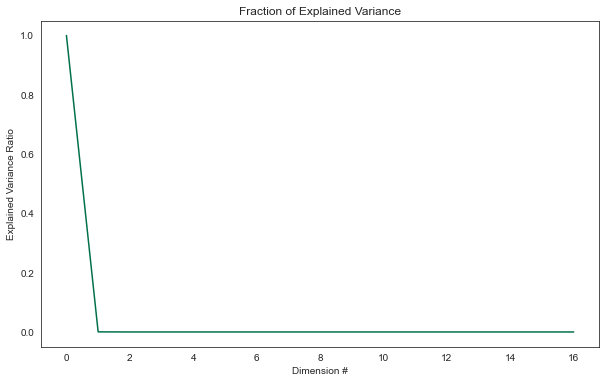

In [382]:
pca_fit_non_std = fit_pca(starbucks_final, starbucks_std_final.shape[1],'fit')
ax = plot_scaled_variance(pca_fit_non_std)

Income Feature explains 100% of the variance

<AxesSubplot:>

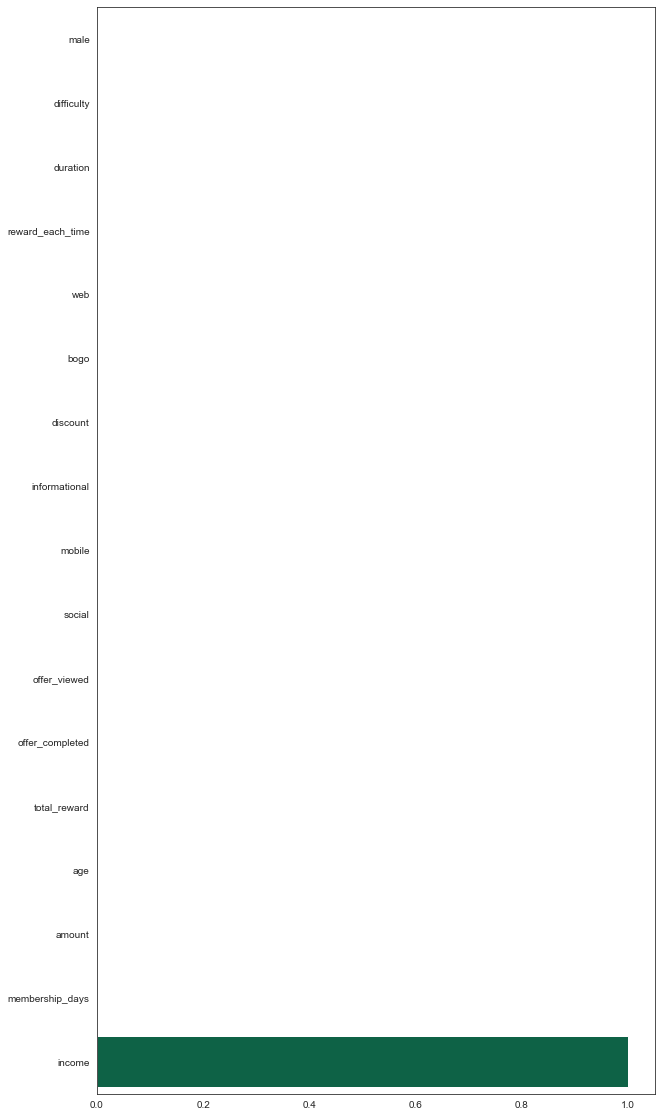

In [383]:
plot_weight(starbucks_final,pca_fit_non_std, 1)

#### PCA on Standardized Data

Component 1 explains little over 30%
Component 2 explains around 17%

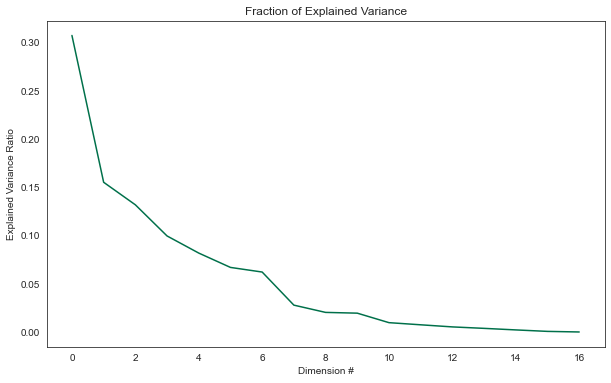

In [164]:
pca_fit = fit_pca(starbucks_std_final, starbucks_std_final.shape[1],'fit')
ax = plot_scaled_variance(pca_fit)

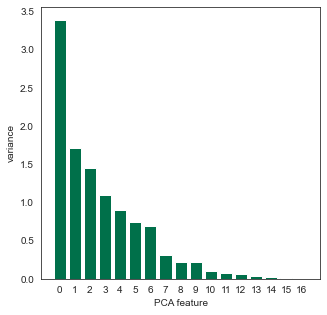

In [165]:
features = range(pca_fit.n_components_)
plt.bar(features, pca_fit.explained_variance_,color = '#00704A')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

**7 Components explain 90% of the explained variance. Since we set our thershold to be 90% , we will use 7 components for our dimension reduction**

Number of Main PCA components that explained at least 85% variance : 7
Number of Main PCA components that explained at least 90% variance : 7
Number of Main PCA components that explained at least 95% variance : 9


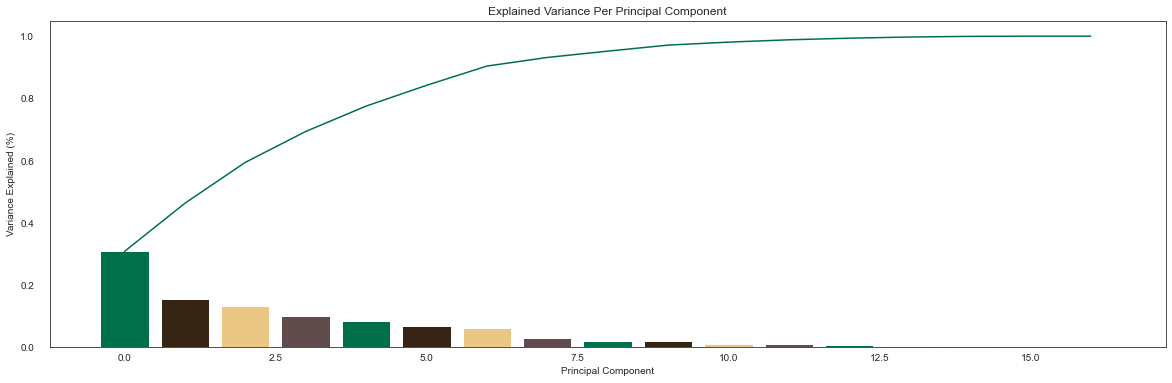

In [166]:
#scree plot 
scree_plot(pca_fit)

#PCA
# number of PCA components that explained at least 95% variance ==> 9 components
cumvals = np.cumsum(pca_fit.explained_variance_ratio_)
print("Number of Main PCA components that explained at least 85% variance : {}".format(np.where(cumvals >= 0.85)[0][0]+1))
print("Number of Main PCA components that explained at least 90% variance : {}".format(np.where(cumvals >= 0.90)[0][0]+1))
print("Number of Main PCA components that explained at least 95% variance : {}".format(np.where(cumvals >= 0.95)[0][0]+1))

#### Setting Explained Variance Thershold of 90% and reduced the dataset to select 7 components
Perform validation on the reduced dataset to check on the explained variance and the weights. 
Rewards,Difficulty,amount given higher weights and it is apt for our analysis since our focus is on the customers responsive to offers and high expenditure

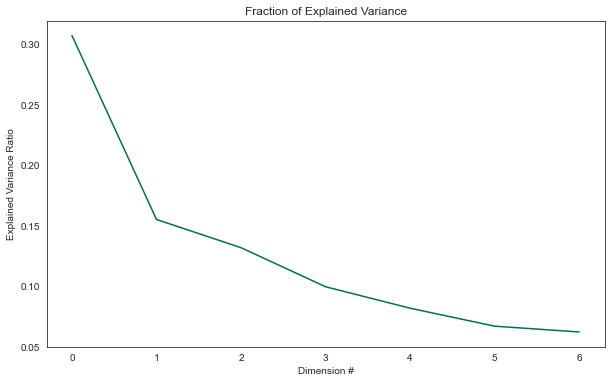

In [167]:
pca_fit_reduced = fit_pca(starbucks_std_final, 7)
ax = plot_scaled_variance(pca_fit_reduced)

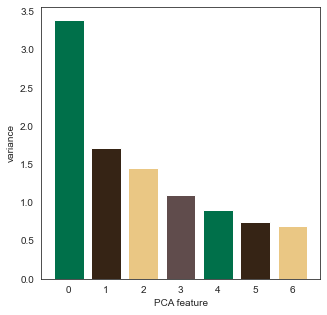

In [168]:
features = range(pca_fit_reduced.n_components_)
plt.bar(features, pca_fit_reduced.explained_variance_,color=starbucks_palette)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Number of Main PCA components that explained at least 90% variance : 7


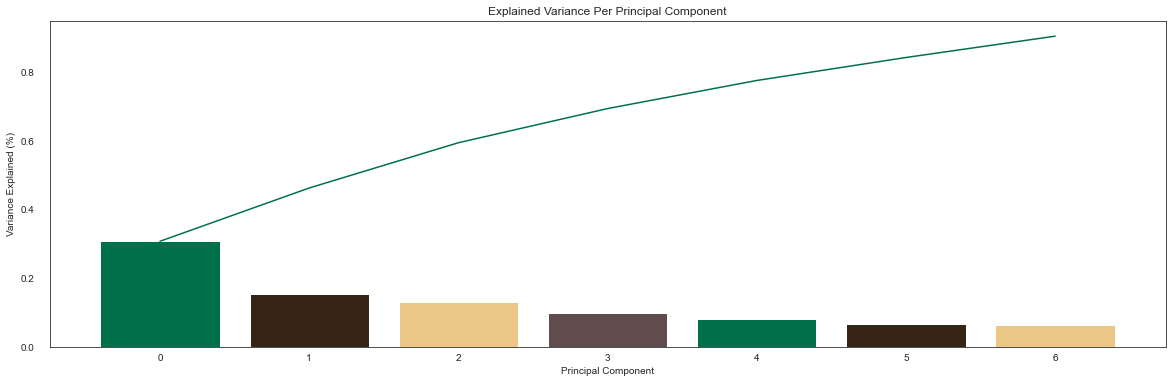

In [169]:
#scree plot 
scree_plot(pca_fit_reduced)

#PCA

cumvals = np.cumsum(pca_fit_reduced.explained_variance_ratio_)
print("Number of Main PCA components that explained at least 90% variance : {}".format(np.where(cumvals >= 0.90)[0][0]+1))

In [170]:
pca_transform = fit_pca(starbucks_std_final, 8,"transform")

<AxesSubplot:>

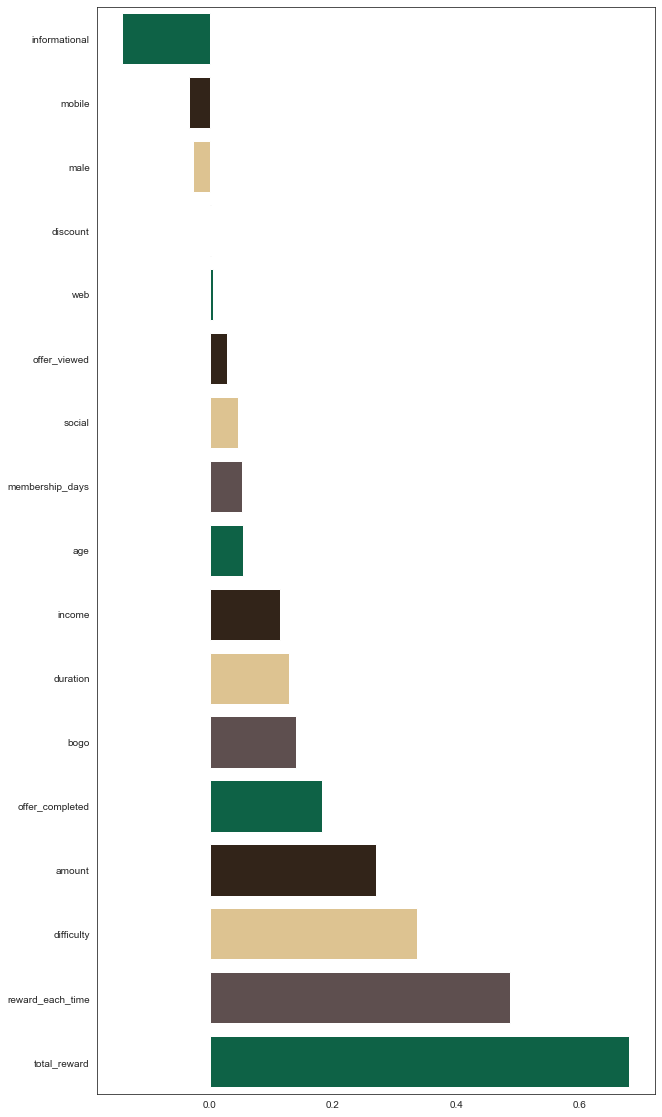

In [171]:
plot_weight(starbucks_std_final,pca_fit_reduced, 1)

#### Save the PCA Reduced dataset

In [172]:
np.save('starbucks_reduced_7_offer_only.npy', pca_transform)

## Machine Learning Model - Unsupervised¶

For this dataset, following models will be implemented and the results will be analyzed and compared to chose the better one.

- K Means
- DBSCAN
- Hierarchical Agglomerative Clustering

### K-means

In [173]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn.utils import check_random_state
from sklearn.cluster import KMeans

In [175]:
def cluster(array, random_state, n_clusters=4):
    '''
    Fits and predicts k-means clustering on "array"
    
    Parameters
    ----------
    array: A numpy array
    random_state: Random seed, e.g. check_random_state(0)
    n_clusters: The number of clusters. Default: 4
    
    Returns
    -------
    A tuple (sklearn.KMeans, np.ndarray)
    '''
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 45000, 
                n_init = 10, random_state = random_state)
    #fit the array,#Predict the clusters
    model = kmeans.fit(array)
    clusters = kmeans.predict(array)
    # Getting the cluster centers
    cluster_centroid = model.cluster_centers_
    #print(clusters) 
    #print(model)
    #print(kmeans)
    
    return model, clusters

def plot_inertia(array, start=1, end=10):
    '''
    Increase the number of clusters from "start" to "end" (inclusive).
    Finds the inertia of k-means clustering for different k.
    Plots inertia as a function of the number of clusters.

    
    Parameters
    ----------
    array: A numpy array.
    start: An int. Default: 1
    end: An int. Default: 10
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    #Your code is here
    #    Increase the number of clusters from "start" to "end" (inclusive).
    #    Finds the inertia of k-means clustering for different k.
    
    #x_axis = range(start,end+1)
    x_axis = []
    inertia = []
    for i in range(start, end+1):
        kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 4500, n_init = 10, random_state = 0)
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)
        x_axis.append(i)
    
    #Plots inertia as a function of the number of clusters.
    fig, ax = plt.subplots(figsize=(10,6))  
     
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia,color = '#00704A')
    
    return ax

def plot_pair(reduced, clusters):
    '''
    Uses seaborn.PairGrid to visualize the data distribution
    when axes are the first four principal components.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    reduced: A numpy array. Comes from importing delta_reduced.npy
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    df = pd.DataFrame(reduced)
    df['c'] = clusters
    subset = [0,1,2,3, 'c']
    columns = [0,1,2,3]
    if clusters.any() == -1:
        # Black used for noise.
        color = 'k'
    
    ax = sns.PairGrid(df[subset], vars = columns, hue = 'c')
    ax = ax.map_diag(plt.hist)
    ax = ax.map_offdiag(plt.scatter)
    
    return ax

from sklearn.metrics import  silhouette_score
from tqdm import tqdm

def plot_silhouette(reduced, min_clusters =2, max_clusters =11):
    
    '''
    Uses seaborn.PairGrid to visualize the data distribution
    when axes are the first four principal components.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    reduced: A numpy array. 
    min_clusters - Start with minimum cluster value
    max_clusters - maximum cluster value
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    silh = []
    clusters = range(min_clusters,max_clusters)
    for n in tqdm(clusters):

        model = KMeans(n_clusters = n, random_state=42)
        preds = model.fit_predict(reduced)

        silhouette_avg = silhouette_score(reduced, preds)

        silh.append(silhouette_avg)
        
        print("For n_clusters = ", n,"The avg silhouette_score is :", silhouette_avg)


    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(clusters, silh,marker="o",color = '#00704A')
    ax.set_ylabel("Silhoutte Score")
    ax.set_xlabel('Number of clusters')


**Create Silhouette and Inertia Plot to identify the number of cluster to be considered for creating K means algorithm**
**Silhouette Coefficient:**
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
1: Means clusters are well apart from each other and clearly distinguished.
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
-1: Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In short, the average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k.

 11%|█████████▎                                                                          | 1/9 [01:11<09:35, 71.93s/it]

For n_clusters =  2 The avg silhouette_score is : 0.25476608155818475


 22%|██████████████████▋                                                                 | 2/9 [02:25<08:27, 72.55s/it]

For n_clusters =  3 The avg silhouette_score is : 0.24785885049936757


 33%|████████████████████████████                                                        | 3/9 [03:39<07:17, 72.84s/it]

For n_clusters =  4 The avg silhouette_score is : 0.2514765672976611


 44%|█████████████████████████████████████▎                                              | 4/9 [04:55<06:08, 73.75s/it]

For n_clusters =  5 The avg silhouette_score is : 0.26164727973434615


 56%|██████████████████████████████████████████████▋                                     | 5/9 [06:09<04:55, 73.93s/it]

For n_clusters =  6 The avg silhouette_score is : 0.28537387306923007


 67%|████████████████████████████████████████████████████████                            | 6/9 [07:22<03:41, 73.71s/it]

For n_clusters =  7 The avg silhouette_score is : 0.25994473333941903


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [08:36<02:27, 73.77s/it]

For n_clusters =  8 The avg silhouette_score is : 0.2545753614946534


 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [09:49<01:13, 73.55s/it]

For n_clusters =  9 The avg silhouette_score is : 0.24967439336922906


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [11:02<00:00, 73.65s/it]

For n_clusters =  10 The avg silhouette_score is : 0.24205944402270316


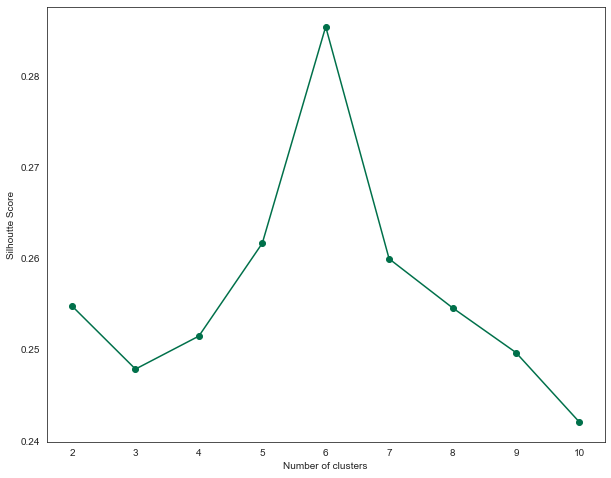

In [176]:
plot_silhouette(pca_transform)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2546574342033516
For n_clusters = 3 The average silhouette_score is : 0.24785885049936757
For n_clusters = 4 The average silhouette_score is : 0.25104523011615754
For n_clusters = 5 The average silhouette_score is : 0.2616477892929267
For n_clusters = 6 The average silhouette_score is : 0.2854328697352339
For n_clusters = 7 The average silhouette_score is : 0.2599590110314865
For n_clusters = 8 The average silhouette_score is : 0.25456893003916814
For n_clusters = 9 The average silhouette_score is : 0.24940251129902694


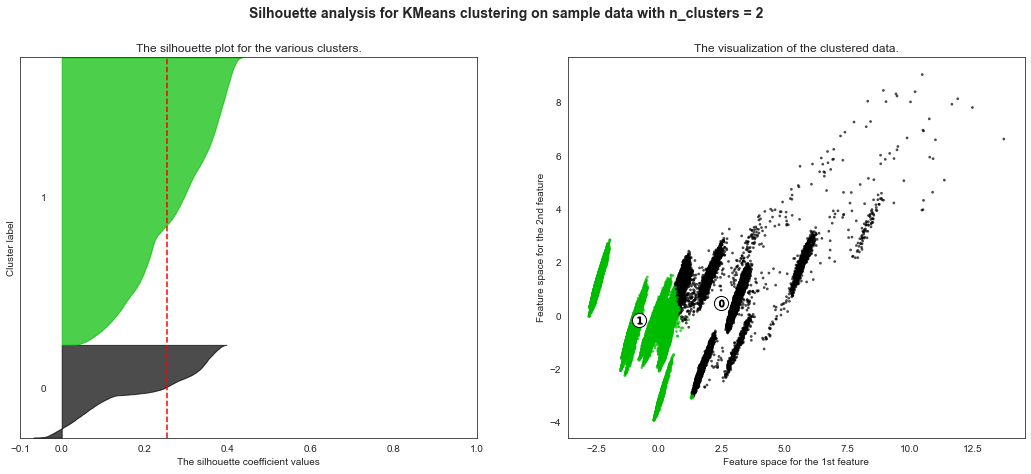

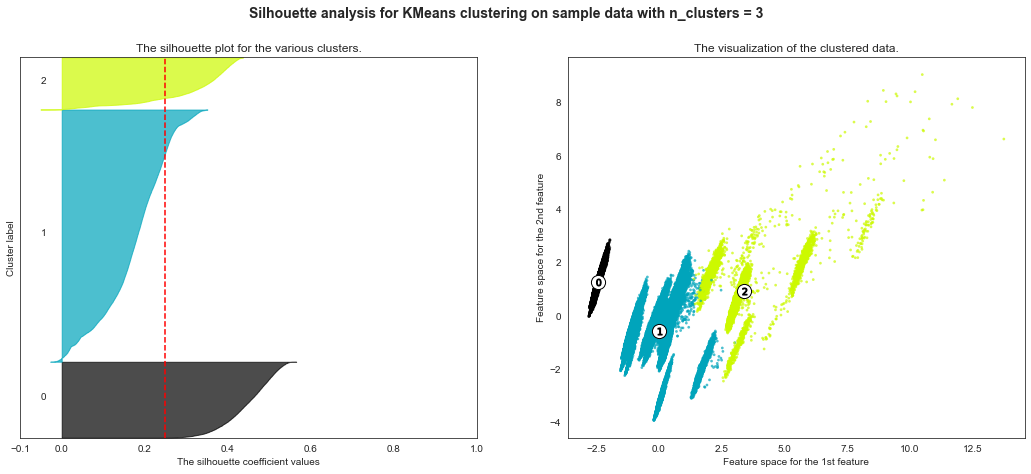

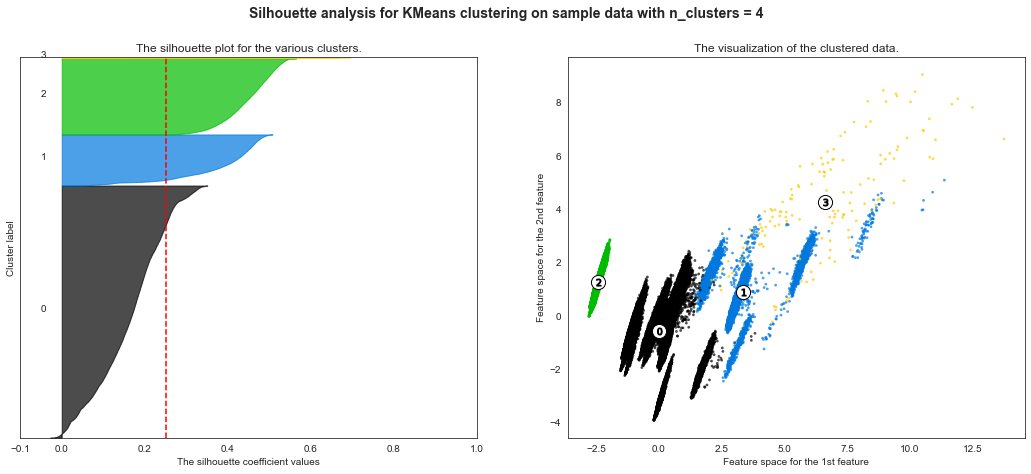

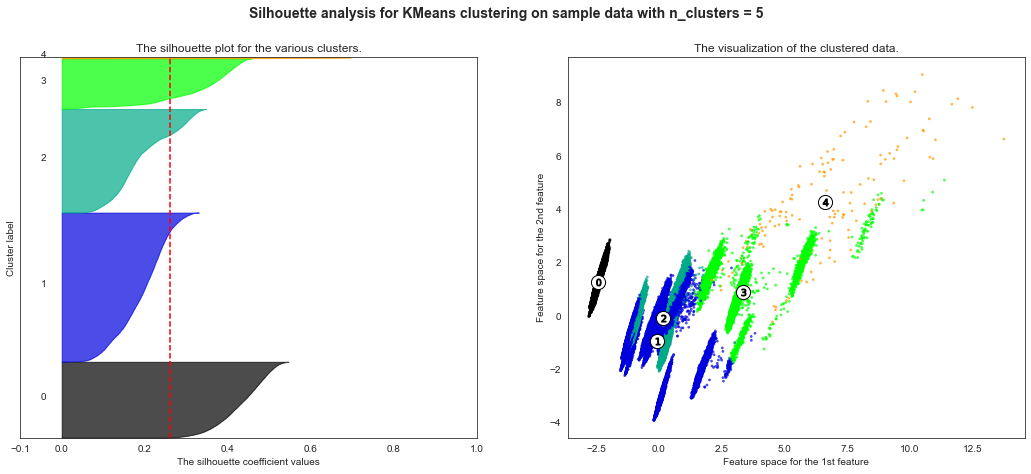

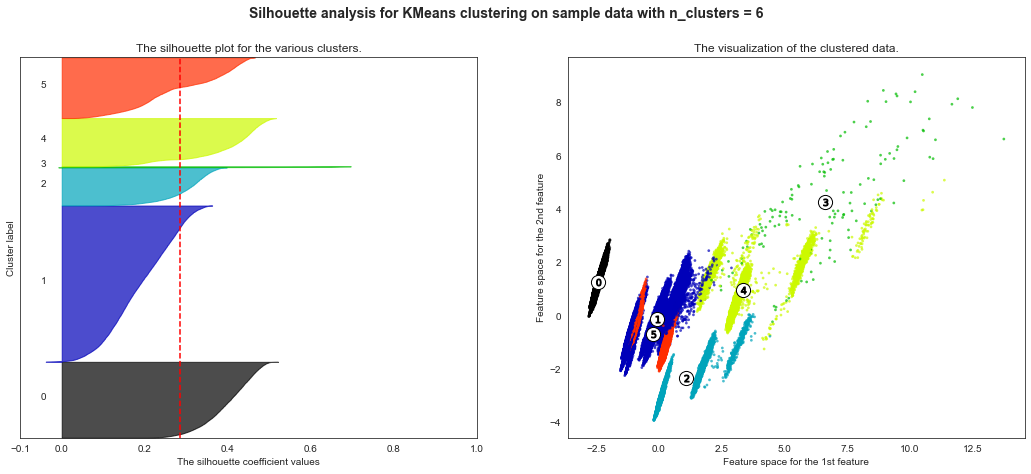

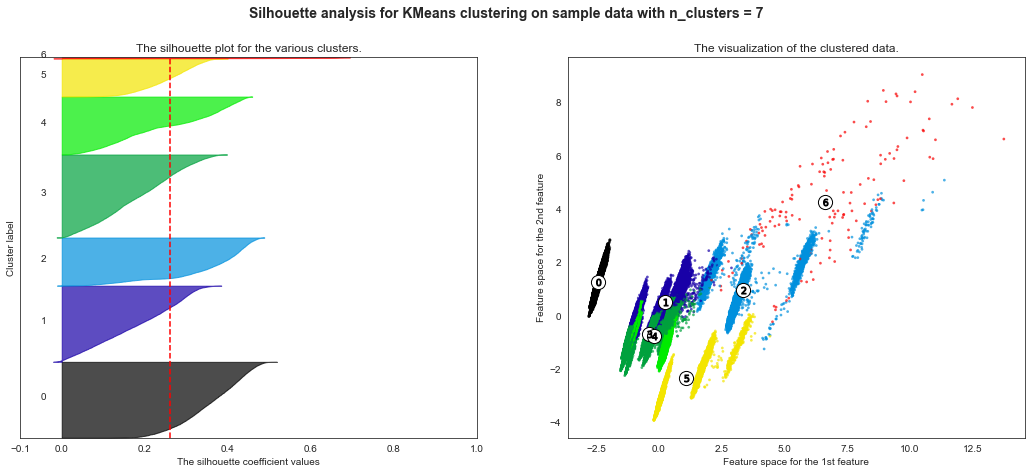

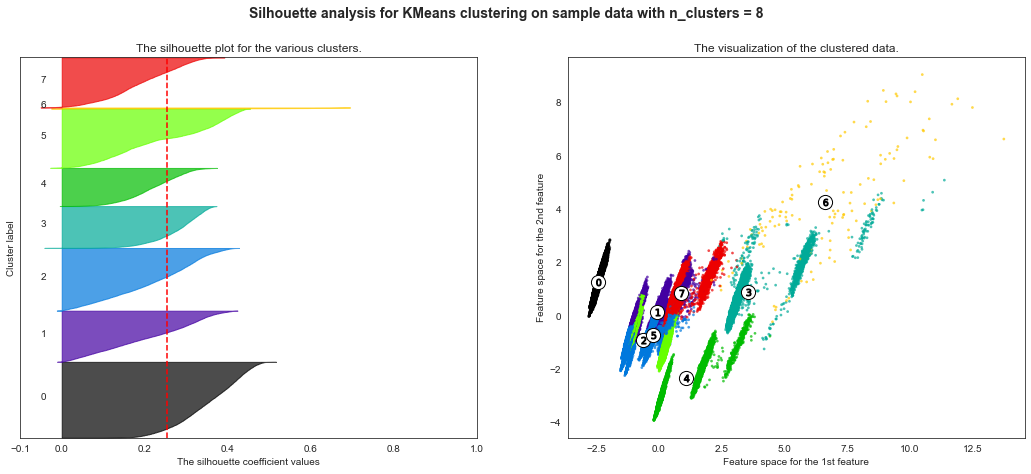

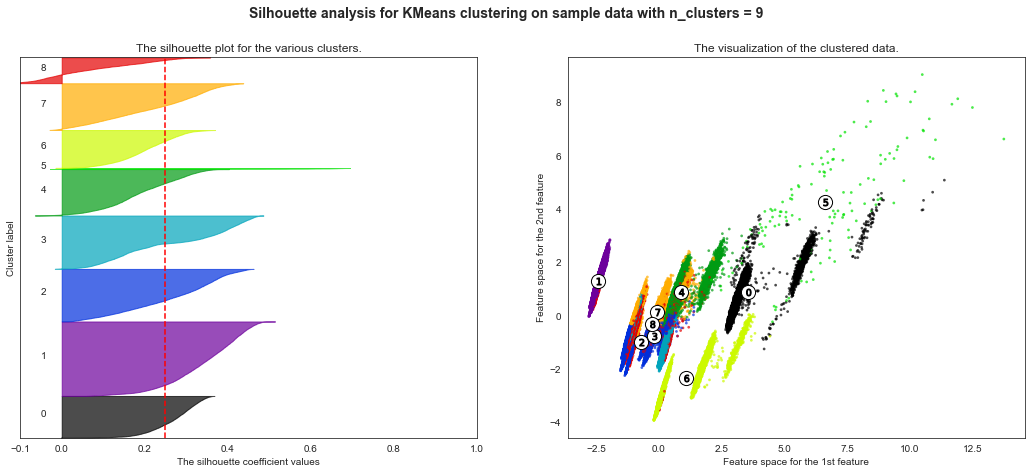

In [177]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=pca_transform


range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

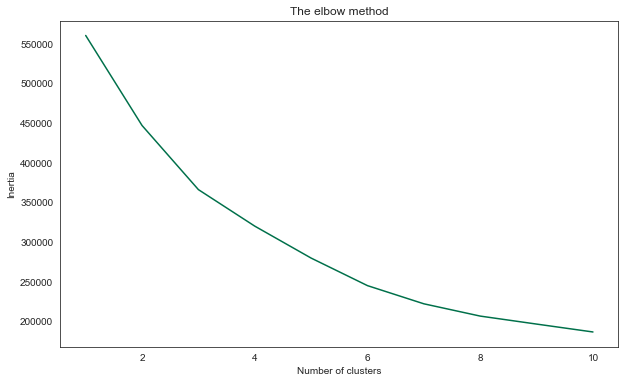

In [178]:
inertia = plot_inertia(pca_transform)

#### Selected Number of Clusters as 6 based on the Silhoutee Coefficient and inertia from the Elbow method

**Low Silhoutee Coefficient 0.28 towards 0 indicates clusters are indifferent and are overlapping and the distance between clusters is not significant.**.**Elbow Diagram indicates the same with no clear Separation**


In [179]:
k_means_t, cluster_t = cluster(pca_transform, random_state=check_random_state(1), n_clusters=6)

####  Create a Dataframe with the actual(non-standard) data , PCA components and the K-Means cluster label for further plotting and analysis 

In [181]:
k_means_plot_df = pd.concat([starbucks_final.reset_index(drop=True),pd.DataFrame(pca_transform)], axis =1)
k_means_plot_df.columns.values[-7: ] = ['PCA_Component1', 'PCA_Component2', 'PCA_Component3', 'PCA_Component4', 'PCA_Component5', 'PCA_Component6', 'PCA_Component7','PCA_Component7']
k_means_plot_df['Cluster'] = cluster_t
k_means_plot_df.groupby('Cluster').count()['offer_completed']

Cluster
0    22408
1    10878
2     8671
3     6896
4      143
5     5457
Name: offer_completed, dtype: int64

**Plot of PCA Component1 and Component2** - to visualize how the data is spread and separated. As we can see , we see lot of data points are spread all over and overlapping, which may explain the low Silhoutte Score.

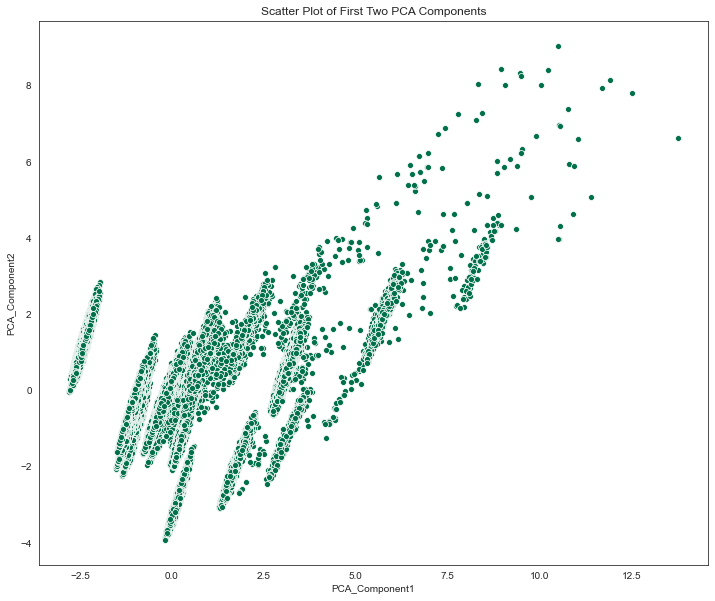

In [184]:
x_ax = k_means_plot_df['PCA_Component1']
y_ax = k_means_plot_df['PCA_Component2']

plt.figure(figsize = (12,10))
sns.scatterplot(x_ax,y_ax,color = '#00704A')
plt.title('Scatter Plot of First Two PCA Components')
plt.show()

In [185]:
k_means_plot_df.head()

offer_viewed  offer_completed  amount  total_reward  age   income  male  \
0           1.0              1.0   16.06           2.0   45  62000.0     0   
1           1.0              0.0    0.00           0.0   71  56000.0     1   
2           1.0              1.0   14.00           4.0   71  73000.0     1   
3           1.0              1.0   20.98           2.0   69  83000.0     0   
4           1.0              1.0   15.16           2.0   59  93000.0     0   

   membership_days  reward_each_time  difficulty  duration  mobile  social  \
0              608               2.0        10.0      10.0     1.0     1.0   
1              158               2.0        10.0      10.0     1.0     1.0   
2              268               2.0        10.0      10.0     1.0     1.0   
3             1040               2.0        10.0      10.0     1.0     1.0   
4              329               2.0        10.0      10.0     1.0     1.0   

   web  bogo  discount  informational  PCA_Component1  PCA_Component2  \
0  1.0   0.0       1.0            0.0       -0.202816       -0.803122   
1  1.0   0.0       1.0            0.0       -1.040182       -1.132220   
2  1.0   0.0       1.0            0.0        0.328107       -0.207716   
3  1.0   0.0       1.0            0.0        0.079007       -0.035736   
4  1.0   0.0       1.0            0.0       -0.031801       -0.173788   

   PCA_Component3  PCA_Component4  PCA_Component5  PCA_Component6  \
0        0.814593        0.726094       -0.301670       -0.474894   
1        0.865640       -0.521266        0.485757       -0.172354   
2        1.337020       -0.282593        0.158375       -0.817941   
3        1.844296       -0.132745       -1.180296        0.224379   
4        1.752054       -0.499418        0.179096       -0.675251   

   PCA_Component7  PCA_Component8  Cluster  
0       -0.155745       -0.908477        0  
1        1.015278       -0.816966        0  
2        0.751125       -0.869162        0  
3        0.045630       -0.897704        0  
4       -0.505420       -0.915971        0

#### Visualize the K-means Clusters
Plot the Clusters for the first 2 components of the reduced dataset and visualize how well the clusters are separated /distanced from each other.

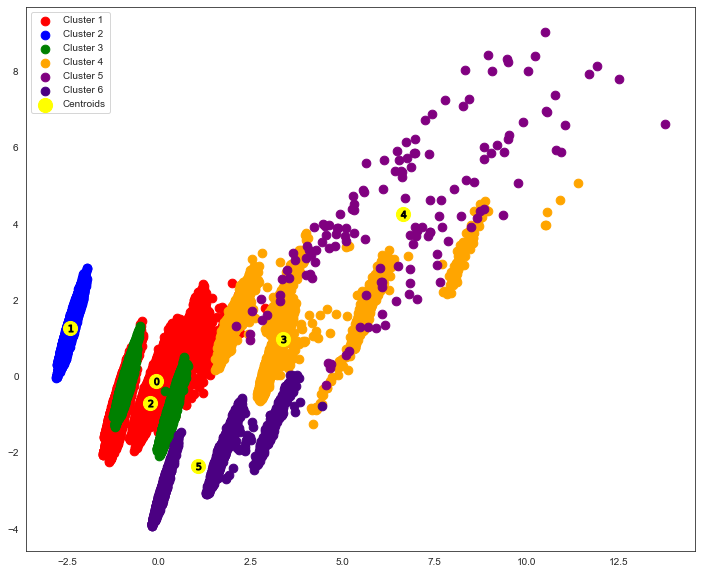

In [188]:
#Visualising the clusters
plt.figure(figsize = (12,10))
plt.scatter(k_means_plot_df.loc[k_means_plot_df['Cluster'] ==0,['PCA_Component1']], k_means_plot_df.loc[k_means_plot_df['Cluster'] ==0,['PCA_Component2']], s = 75, 
            c = 'red', label = 'Cluster 1')
plt.scatter(k_means_plot_df.loc[k_means_plot_df['Cluster'] ==1,['PCA_Component1']], k_means_plot_df.loc[k_means_plot_df['Cluster'] ==1,['PCA_Component2']], s = 75, 
            c = 'blue', label = 'Cluster 2')
plt.scatter(k_means_plot_df.loc[k_means_plot_df['Cluster'] ==2,['PCA_Component1']], k_means_plot_df.loc[k_means_plot_df['Cluster'] ==2,['PCA_Component2']], s = 75, 
            c = 'green', label = 'Cluster 3')
plt.scatter(k_means_plot_df.loc[k_means_plot_df['Cluster'] ==3,['PCA_Component1']], k_means_plot_df.loc[k_means_plot_df['Cluster'] ==3,['PCA_Component2']], s = 75, 
            c = 'orange', label = 'Cluster 4')
plt.scatter(k_means_plot_df.loc[k_means_plot_df['Cluster'] ==4,['PCA_Component1']], k_means_plot_df.loc[k_means_plot_df['Cluster'] ==4,['PCA_Component2']], s = 75, 
            c = 'purple', label = 'Cluster 5')
plt.scatter(k_means_plot_df.loc[k_means_plot_df['Cluster'] ==5,['PCA_Component1']], k_means_plot_df.loc[k_means_plot_df['Cluster'] ==5,['PCA_Component2']], s = 75, 
            c = 'indigo', label = 'Cluster 6')
#plt.scatter(k_means_plot_df.loc[k_means_plot_df['Cluster'] ==6,['PCA_Component1']], k_means_plot_df.loc[k_means_plot_df['Cluster'] ==6,['PCA_Component2']], s = 75, 
#            c = 'violet', label = 'Cluster 7')


#Plotting the centroids of the clusters
plt.scatter(k_means_t.cluster_centers_[:, 0], 
            k_means_t.cluster_centers_[:, 1], s = 200, 
            c = 'yellow', label = 'Centroids')

for i, c in enumerate(k_means_t.cluster_centers_):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

plt.legend()

As expected , with our earlier observation of low silhouette coefficient , we can identify that clusters are not evenly separated and overlapping each other, with Cluster 0 densely populated and Cluster 4 scarcely populated . Also the high spending customers who are identified as outliers are grouped as one clusters(Cluster 4). We will do further analysis on the Cluster features and identify what group of Customers contributed in each Cluster.

## DB SCAN

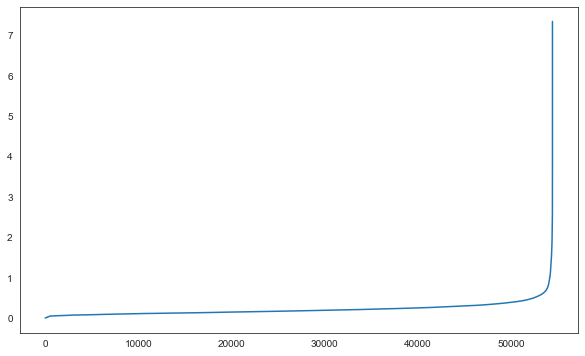

In [193]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
#We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. 
#The point itself is included in n_neighbors. 
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(pca_transform)

#The kneighbors method returns two arrays, 
#one which contains the distance to the closest n_neighbors points 
#and the other which contains the index for each of those points.
distances, indices = nbrs.kneighbors(pca_transform)

#sort and plot results
plt.figure(figsize = (10,6))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Tried Varying combinations of eps and min_samples ranging from eps value of 0.4 to 1.3 and min sample of 2 to 100.

In [45]:

dbsc = DBSCAN(eps = 0.90, min_samples = 20).fit(pca_transform)
#Get the cluster labels
labels = dbsc.labels_
###print (labels)
#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
##print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(y, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(y, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 13
Estimated number of noise points: 1009


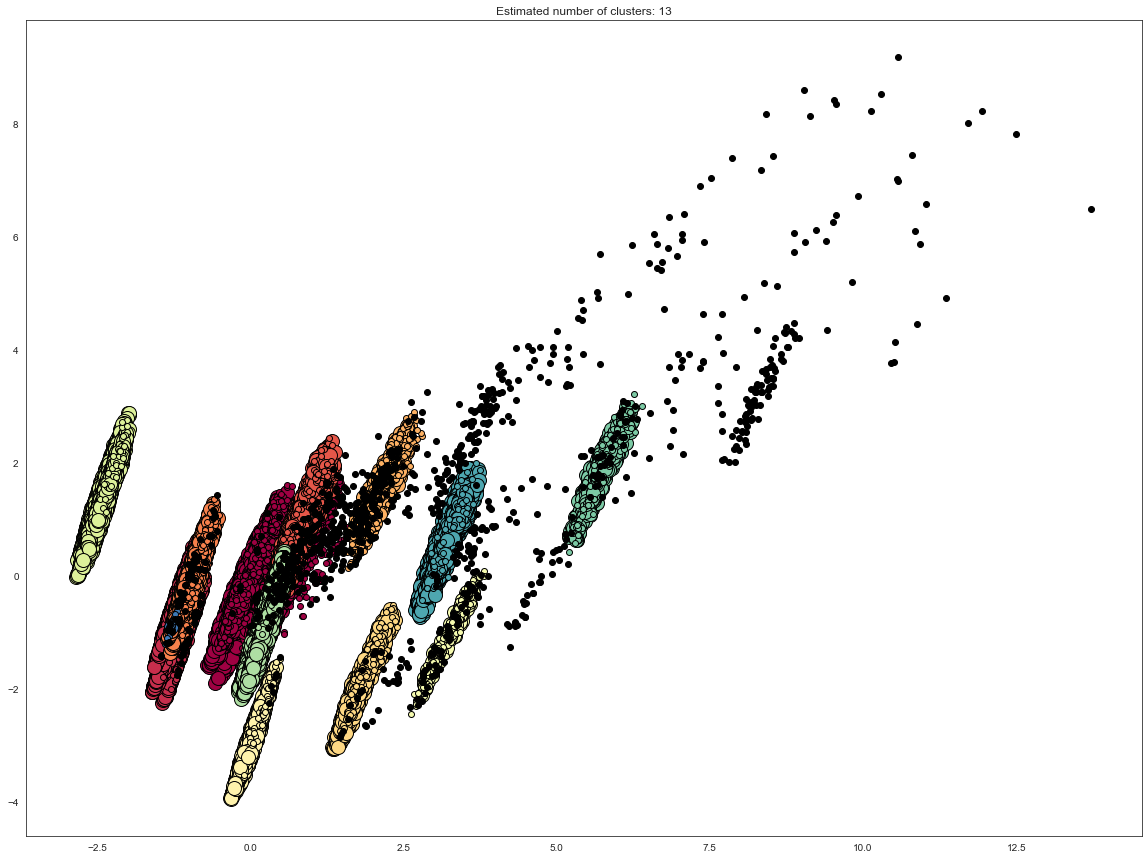

In [46]:
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_transform[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_transform[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [219]:
dbsc = DBSCAN(eps = 1.10, min_samples = 20).fit(pca_transform)
#Get the cluster labels
labels = dbsc.labels_
###print (labels)
#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
##print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(y, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(y, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 12
Estimated number of noise points: 622


**eps = 1.00 and min_sample = 20 is the selected one for DBSCAN.**

This combination of the values gave optimal number of clusters and with less noise. Otherwise combinations lead to either more clusters or more noise.

In [220]:
dbsc = DBSCAN(eps = 1.00, min_samples = 20).fit(pca_transform)
#Get the cluster labels
labels = dbsc.labels_
###print (labels)
#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
##print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(y, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(y, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 11
Estimated number of noise points: 770


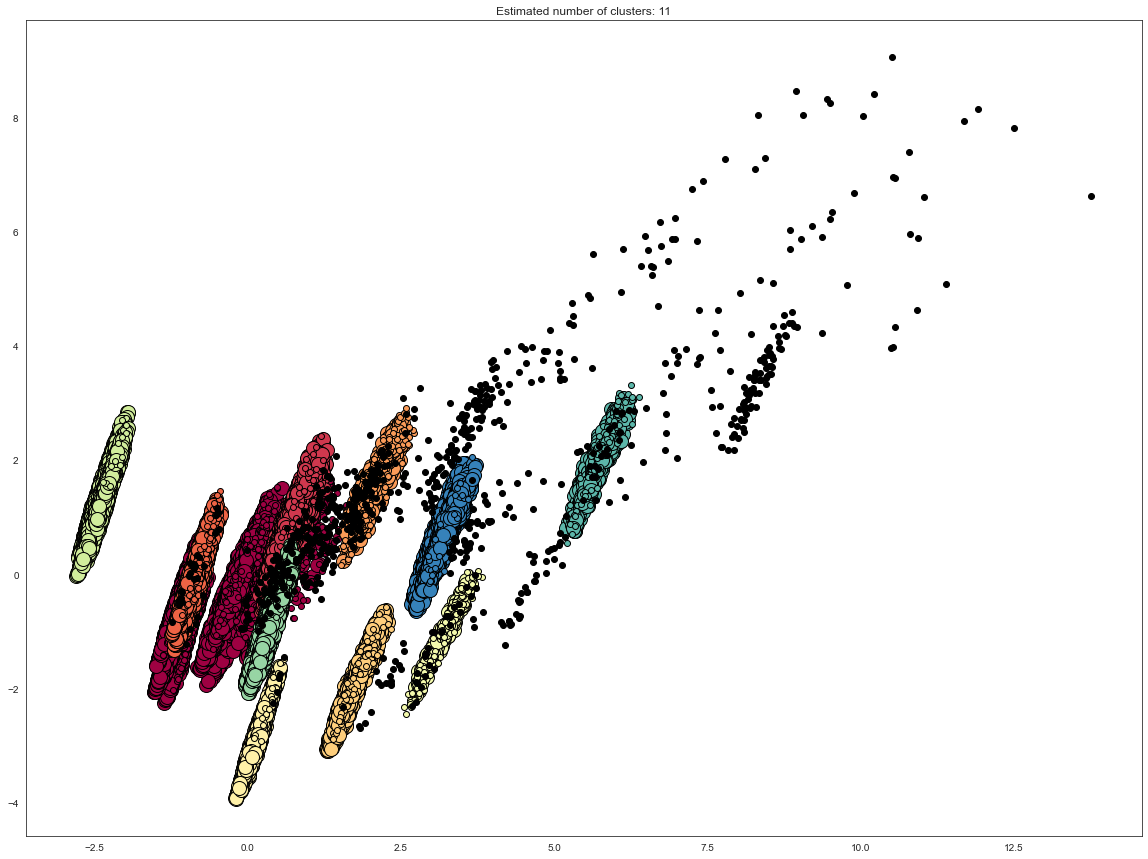

In [221]:
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_transform[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_transform[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

DBSCAN algorithm captured high volume transactions/outliers as noise. Apart from that there is better segregation between the customer of different offer types and difficulty . Though there are too many clusters , better customer segregation based on the offer used, amount spent than K-means

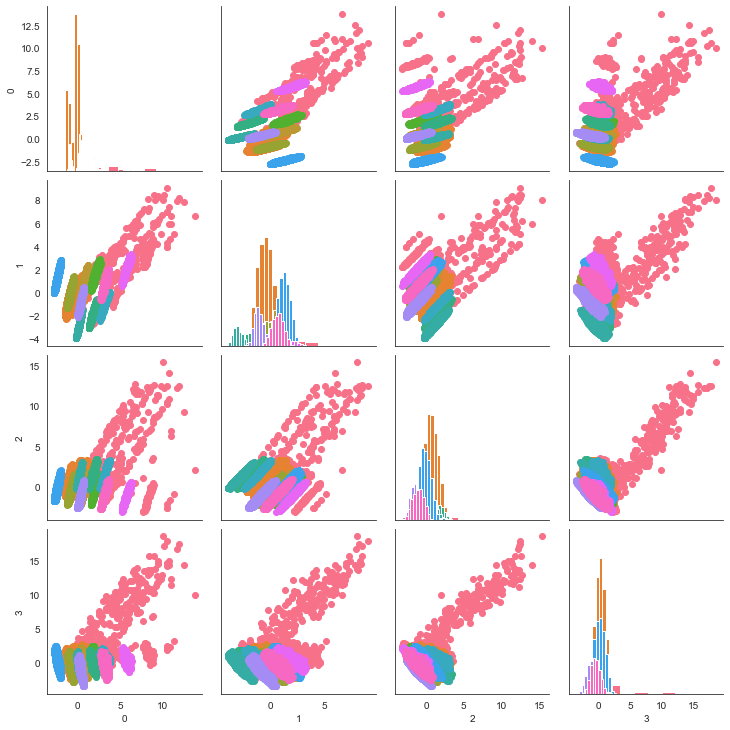

In [384]:
pg = plot_pair(pca_transform, labels)

Update the DBSCAN Cluster results to the output Dataframe for cluster analysis

In [284]:
k_means_plot_df['DBSCAN_Cluster'] = dbsc.labels_
k_means_plot_df.groupby('DBSCAN_Cluster').count()['offer_completed']

DBSCAN_Cluster
-1       770
 0     16033
 1      6026
 2      3749
 3       854
 4      2445
 5      2613
 6       341
 7     10878
 8      5011
 9       757
 10     4976
Name: offer_completed, dtype: int64

## Hierarchical agglomerative clustering

In [223]:
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [224]:
def dendo(data,link_mthd,getxlbl,px=12,py=10):
    mergings = linkage(data, method=link_mthd)
    companies = getxlbl.index.tolist() 
    # Plot the dendrogram
    plt.figure(figsize=(px,py))
    dendrogram(mergings,
    labels= companies,
    leaf_rotation=90.,
    leaf_font_size=8)
    plt.show()

**Create Dendogram to determine the number of CLusters**

<span style='color:Red'> Caution: Dendogram runs over 8 hours for this dataset.</span>

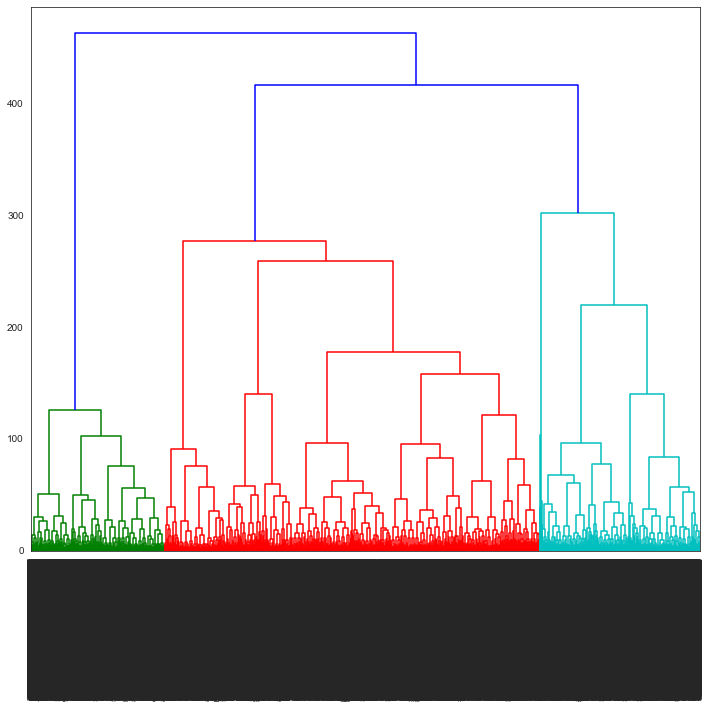

In [125]:
#Create Dendogram 
dendo(pca_transform,'ward',starbucks_final)

**Set Threshold of 300 and determine the clusters - Number of Clusters=3**

In [246]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_array = cluster.fit_predict(pca_transform) 
cluster_array

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

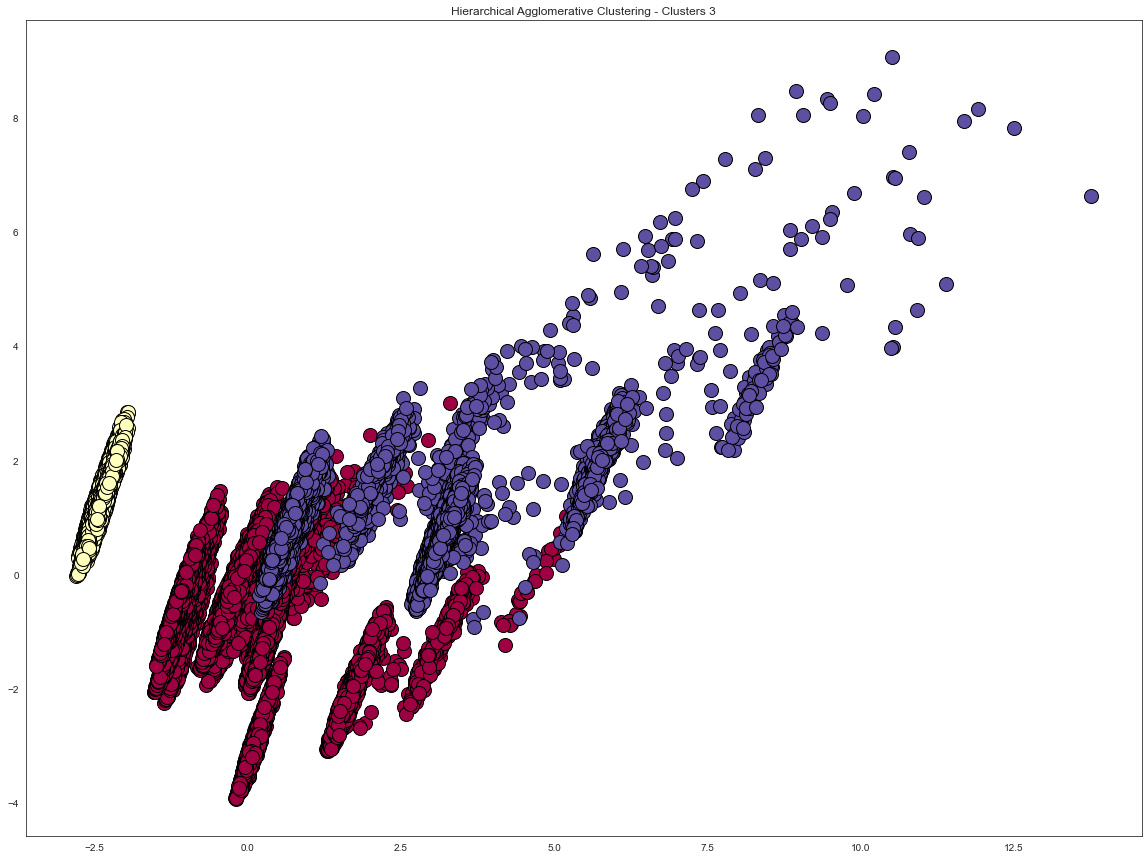

In [373]:
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
# Black removed and is used for noise instead.
unique_labels = set(cluster_array)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_array == k)

    xy = pca_transform[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Hierarchical Agglomerative Clustering - Clusters 3')
plt.show()

Update the Cluster results to the output Dataframe for cluster analysis

In [285]:
k_means_plot_df['Hier_Agg_Cluster'] = cluster_array
k_means_plot_df.groupby('Hier_Agg_Cluster').count()['offer_completed']

Hier_Agg_Cluster
0    30523
1    10878
2    13052
Name: offer_completed, dtype: int64

**Set Threshold of 250 and determine the clusters - Nmmber of Clusters = 6**

In [371]:
cluster_6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster_array_6 = cluster_6.fit_predict(pca_transform) 
cluster_array_6
k_means_plot_df['Hier_Agg_Cluster_6'] = cluster_array_6
k_means_plot_df.groupby('Hier_Agg_Cluster_6').count()['offer_completed']

Hier_Agg_Cluster_6
0    12876
1    10878
2    16287
3     8776
4      176
5     5460
Name: offer_completed, dtype: int64

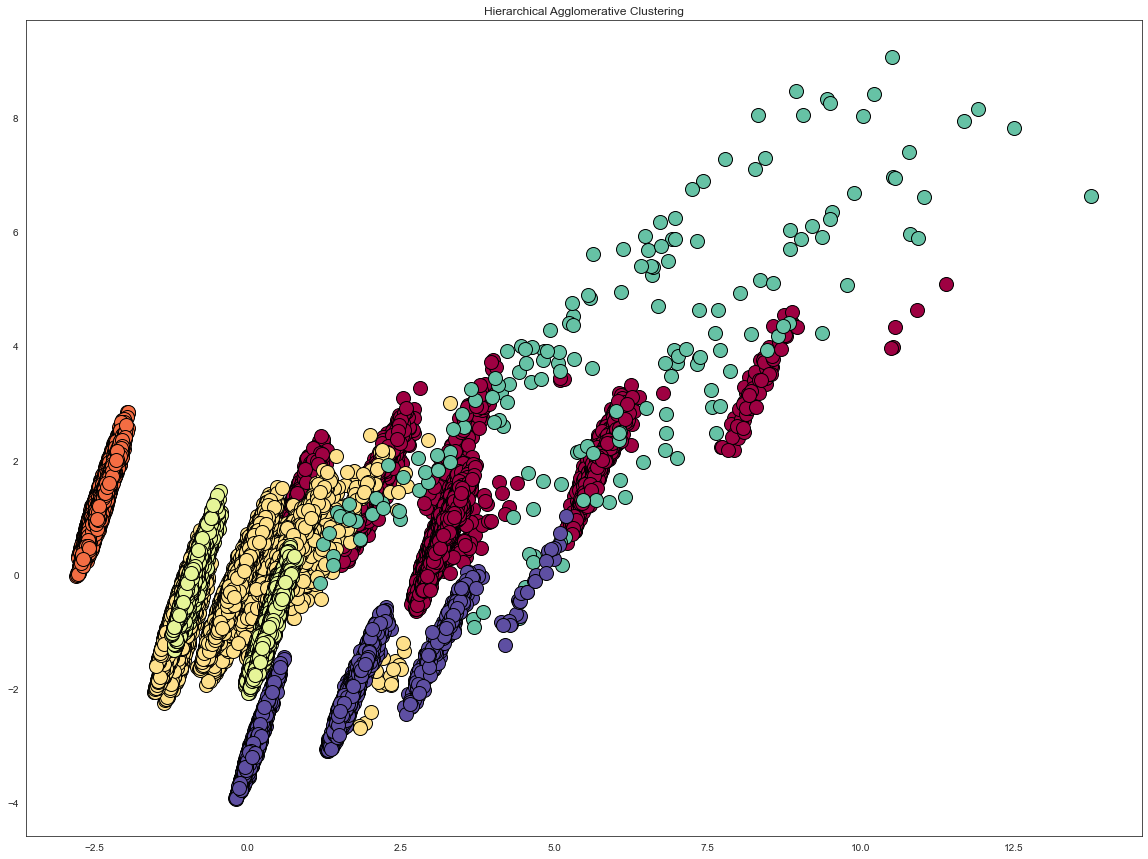

In [372]:
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
# Black removed and is used for noise instead.
unique_labels = set(cluster_array_6)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_array_6 == k)

    xy = pca_transform[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Hierarchical Agglomerative Clustering - Clusters 6')
plt.show()

Hierarchical Cluster with Number of Clusters as 6 gave similar results to K Means in terms of data separation with Cluster 0 more dense than the other.

#### Cluster Visualization with TSNE to identify how well the similar customers are grouped together
Modelled using the standardized data and plot using the cluster lables for all 3 models ( K-Means,DBSCAN,Hierarchical Clustering)

In [287]:
""" Visualise Cluster with TSNE"""
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42,learning_rate=100).fit_transform(pca_transform)


#### TSNE Visualization with color coding based on the K means cluster

<Figure size 1440x1080 with 0 Axes>

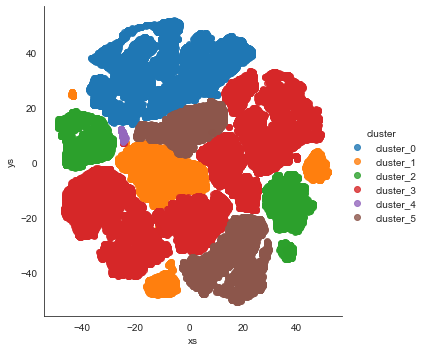

In [103]:
tsne_df = pd.DataFrame(tsne, columns=['xs', 'ys'])
tsne_df['cluster'] =  ['cluster_' + str(i) for i in cluster_t]

#plot tsne

plt.figure(figsize = (20,15))
#sns.scatterplot('xs','ys', hue='cluster', data=tsne_df, ax=ax, hue_order=['cluster_' + str(i) for i in range(0,7)])
ax.set_title("K means Cluster with TSNE")


sns.lmplot(x='xs', y='ys', data=tsne_df, hue='cluster', fit_reg=False,hue_order=['cluster_' + str(i) for i in range(0,6)])

#### TSNE Visualization with color coding based on the DBSCAN cluster

<Figure size 1440x1080 with 0 Axes>

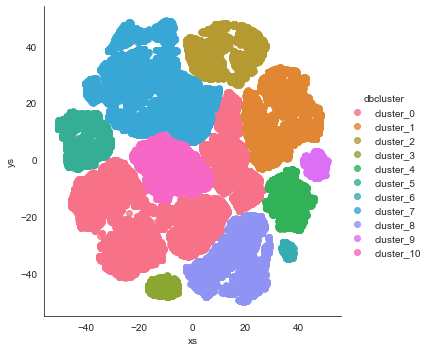

In [288]:
tsne_df = pd.DataFrame(tsne, columns=['xs', 'ys'])
tsne_df['dbcluster'] =  ['cluster_' + str(i) for i in dbsc.labels_]

#plot tsne

plt.figure(figsize = (20,15))

ax.set_title("DBSCAN Cluster with TSNE")


sns.lmplot(x='xs', y='ys', data=tsne_df, hue='dbcluster', fit_reg=False,hue_order=['cluster_' + str(i) for i in range(0,11)])

#### TSNE Visualization with color coding based on the Hierarchical model with 3 Clusters

<Figure size 1440x1080 with 0 Axes>

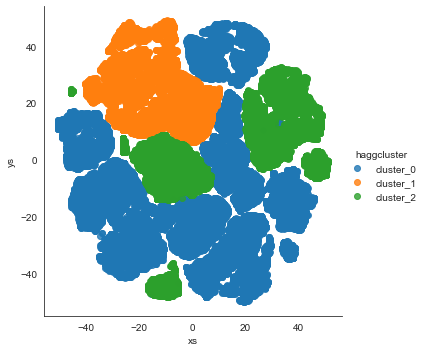

In [289]:
tsne_df = pd.DataFrame(tsne, columns=['xs', 'ys'])
tsne_df['haggcluster'] =  ['cluster_' + str(i) for i in cluster_array]

#plot tsne

plt.figure(figsize = (20,15))

ax.set_title("Agglomerative Hierarchical Cluster with TSNE")


sns.lmplot(x='xs', y='ys', data=tsne_df, hue='haggcluster', fit_reg=False,hue_order=['cluster_' + str(i) for i in range(0,3)])

#### TSNE Visualization with color coding based on the Hierarchical model with 6 Clusters

<Figure size 1440x1080 with 0 Axes>

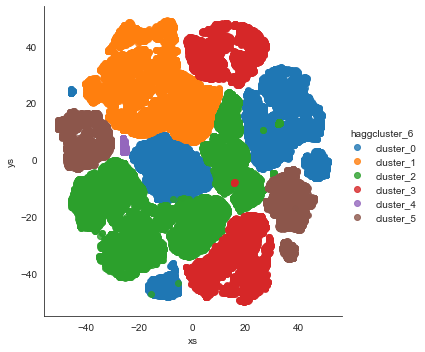

In [374]:
tsne_df = pd.DataFrame(tsne, columns=['xs', 'ys'])
tsne_df['haggcluster_6'] =  ['cluster_' + str(i) for i in cluster_array_6]

#plot tsne

plt.figure(figsize = (20,15))

ax.set_title("Agglomerative Hierarchical Cluster with TSNE")


sns.lmplot(x='xs', y='ys', data=tsne_df, hue='haggcluster_6', fit_reg=False,hue_order=['cluster_' + str(i) for i in range(0,6)])

**t-sne Visualization** showed much clear separation for DBSCAN than the other two algorithms which reflects in our 2-d plots of the first 2 components

In [113]:
tsne_df.head()

xs         ys    cluster
0 -40.034298  -6.400360  cluster_3
1  15.238593  23.910955  cluster_3
2 -38.615051 -13.855296  cluster_3
3 -37.236649 -22.705864  cluster_3
4 -45.810493 -15.043859  cluster_3

#### GMM - EM Model 

 This model is considered with the assumption that K-Means and DBScan is not able to understand the distribution and it was recommended to  give the Gaussian Mixture Model (GMM),EM algorithm  a try. This clustering method could give better results and in that case, it assumes that the input variables are a mix of Gaussian (bell-shaped) distributions. We are giving a shot here to see if this model performs better than the rest.

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

Scikit-learn implements different classes to estimate Gaussian mixture models, that correspond to different estimation strategies, detailed below.

References: 
    
https://scikit-learn.org/stable/modules/mixture.html

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.fit

http://www.lx.it.pt/~mtf/IEEE_TPAMI_2002.pdf

https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php

In [228]:
!pip install gmm-mml
from gmm_mml import GmmMml
##gmm=GmmMml(plots=True)
##gmm.fit(pca_transform)

In [241]:
from matplotlib import style
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

In [243]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
    
    
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [244]:
n_clusters=np.arange(2, 12)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(pca_transform) 
        
        tmp_bic.append(gmm.bic(pca_transform))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

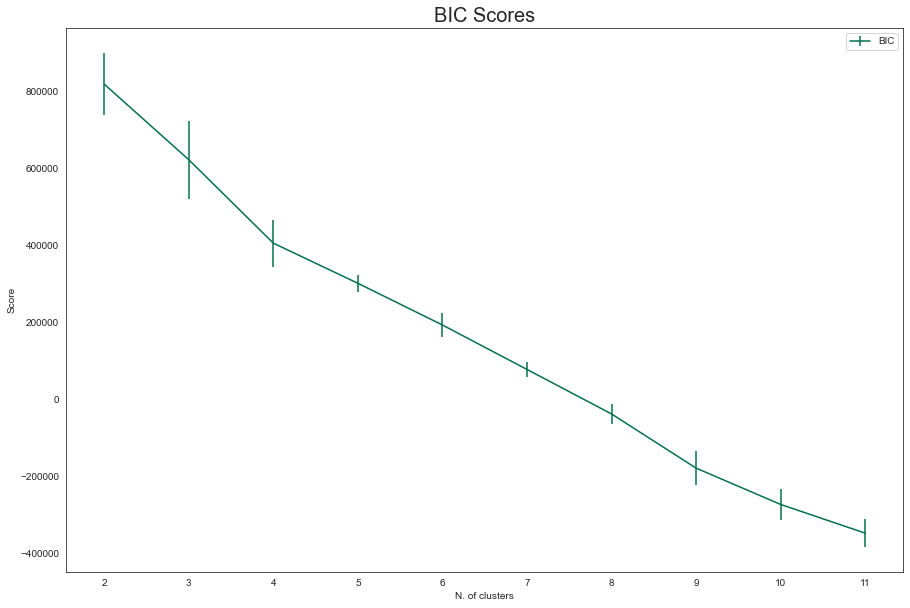

In [261]:
fig = plt.figure(figsize=(15,10))
plt.errorbar(n_clusters[0:10],bics[0:10], yerr=bics_err[0:10], label='BIC',color = starbucks_palette[0])
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters[0:10])
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

In [257]:
n_clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

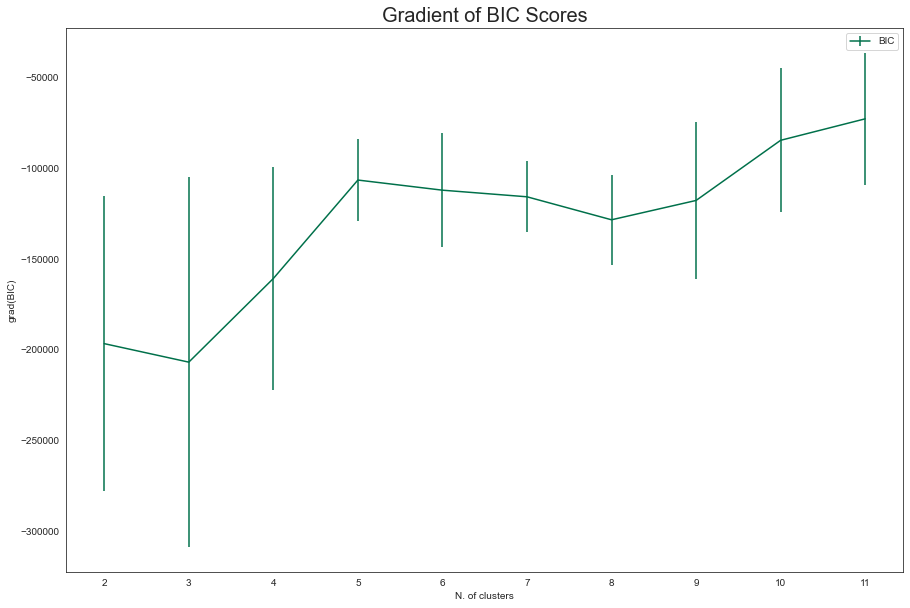

In [262]:
fig = plt.figure(figsize=(15,10))
plt.errorbar(n_clusters[0:10], np.gradient(bics)[0:10], yerr=bics_err[0:10], label='BIC',color = starbucks_palette[0])
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters[0:10])
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

Selecting Number of Clusters as 5 Since change in BIC scores is less significant and flattened compare to the change from 4 to 5.

Converged: True
[4 4 4 ... 4 4 4]


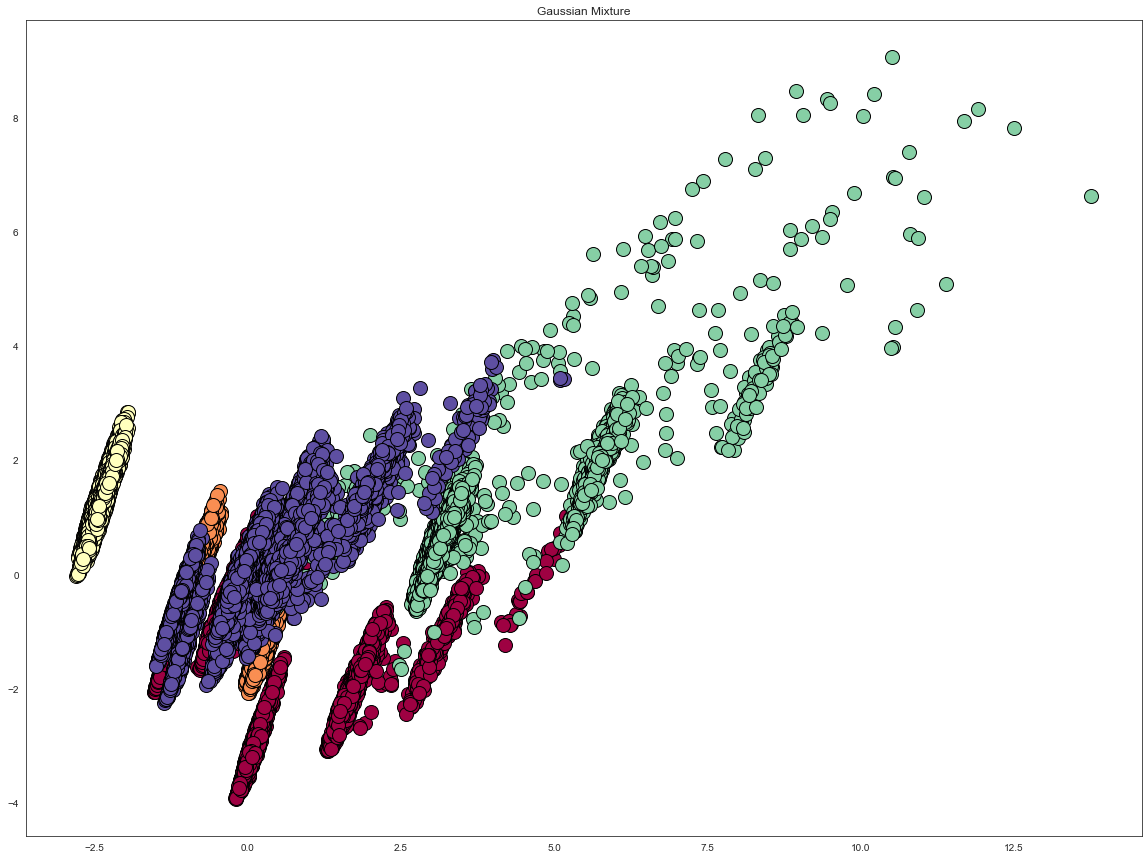

In [281]:
X=pca_transform
# Stratch dataset to get ellipsoid data
#X = np.dot(X,np.random.RandomState(0).randn(2,2))

#x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
#XY = np.array([x.flatten(),y.flatten()]).T

GMM = GaussianMixture(n_components=5).fit(X) # Instantiate and fit the model
# Check if the model has converged
print('Converged:',GMM.converged_) 
GMM_predict = GaussianMixture(n_components=5).fit_predict(X)

means = GMM.means_ 
covariances = GMM.covariances_

GMM_predict = GMM.predict(X)
print(GMM_predict)
np.unique(GMM_predict, return_counts=True)
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
# Black removed and is used for noise instead.
unique_labels = set(GMM_predict)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (GMM_predict == k)

    xy = pca_transform[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Gaussian Mixture')
plt.show()

Also tried to build model with the 6 Clusters.

Converged: True
[2 2 2 ... 2 2 2]


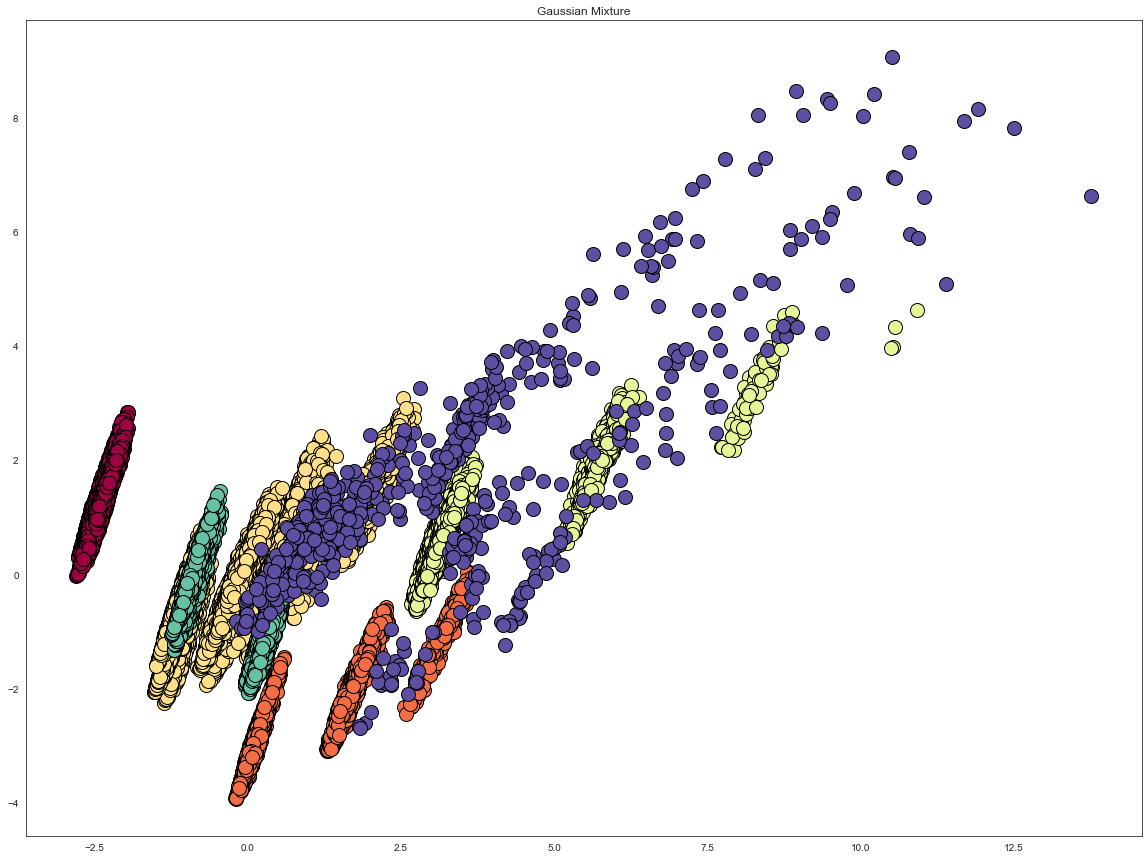

In [282]:
X=pca_transform
# Stratch dataset to get ellipsoid data
#X = np.dot(X,np.random.RandomState(0).randn(2,2))

#x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
#XY = np.array([x.flatten(),y.flatten()]).T

GMM = GaussianMixture(n_components=6).fit(X) # Instantiate and fit the model
# Check if the model has converged
print('Converged:',GMM.converged_) 
GMM_predict = GaussianMixture(n_components=6).fit_predict(X)

means = GMM.means_ 
covariances = GMM.covariances_

GMM_predict = GMM.predict(X)
print(GMM_predict)
np.unique(GMM_predict, return_counts=True)
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
# Black removed and is used for noise instead.
unique_labels = set(GMM_predict)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (GMM_predict == k)

    xy = pca_transform[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Gaussian Mixture')
plt.show()

**The results of GMM Model closely resembles the K means and not much improvement from the other models. Need more understand of the GMM and other optimization techniques to further the analysis and to better intercept the model. This will be taken as a  future work and continue to study on this given dataset.**

## Cluster Analysis
####  Identifying the Customer Segmentation - Best vs Worst

Group the age and income for easier grouping and plotting

In [378]:
ages = ['20-', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
k_means_plot_df['age_group'] = pd.cut(k_means_plot_df.age, bins=[0, 20, 30, 40, 50, 60, 70, 120], right = False, labels = ages)
# Create income groups
ages = ['40K-', '40-59K', '60-79K', '80-99K', '100K+']
k_means_plot_df['income_group'] = pd.cut(k_means_plot_df.income, 
                                   bins=[0, 40000, 60000, 80000, 100000, 300000], right = False, labels = ages)

In [379]:
k_means_plot_df.to_csv("Starbucks_Cluster_Output.csv")

In [380]:
k_means_plot_df.columns

Index(['offer_viewed', 'offer_completed', 'amount', 'total_reward', 'age',
       'income', 'male', 'membership_days', 'reward_each_time', 'difficulty',
       'duration', 'mobile', 'social', 'web', 'bogo', 'discount',
       'informational', 'PCA_Component1', 'PCA_Component2', 'PCA_Component3',
       'PCA_Component4', 'PCA_Component5', 'PCA_Component6', 'PCA_Component7',
       'PCA_Component8', 'Cluster', 'DBSCAN_Cluster', 'Hier_Agg_Cluster',
       'age_group', 'income_group', 'Hier_Agg_Cluster_6'],
      dtype='object')

In [387]:
k_means_plot_df.groupby(['age_group', 'income_group']).agg({'amount':['sum'], 
                                                          'male':['sum'],
                                                          'offer_completed' : ['sum'],
                                                          'total_reward' : ['sum'],
                                                          'bogo':['sum'],
                                                          'discount':['sum'], 
                                                          })

amount    male offer_completed total_reward    bogo  \
                             sum     sum             sum          sum     sum   
age_group income_group                                                          
20-       40K-            786.12   146.0            51.0        268.0    73.0   
          40-59K         1762.42   303.0           139.0        756.0   148.0   
          60-79K         1633.97   144.0            89.0        486.0    83.0   
          80-99K             NaN     NaN             NaN          NaN     NaN   
          100K+              NaN     NaN             NaN          NaN     NaN   
20-29     40K-           5678.70   953.0           451.0       2292.0   514.0   
          40-59K        15738.20  1554.0           892.0       4805.0   896.0   
          60-79K        13685.83  1090.0           705.0       3793.0   622.0   
          80-99K             NaN     NaN             NaN          NaN     NaN   
          100K+              NaN     NaN             NaN          NaN     NaN   
30-39     40K-           6875.62   846.0           470.0       2525.0   493.0   
          40-59K        18420.23  1606.0          1088.0       5801.0   981.0   
          60-79K        19700.11  1174.0           849.0       4718.0   669.0   
          80-99K         4492.06   129.0           163.0        953.0    92.0   
          100K+           174.71     4.0             7.0         36.0     4.0   
40-49     40K-           6514.31   796.0           384.0       2094.0   476.0   
          40-59K        22124.40  2020.0          1332.0       7585.0  1182.0   
          60-79K        31067.63  1741.0          1475.0       8683.0  1144.0   
          80-99K        22388.62   672.0           770.0       4759.0   541.0   
          100K+          3732.32    60.0           122.0        773.0    81.0   
50-59     40K-           5099.46   875.0           413.0       2067.0   481.0   
          40-59K        29493.10  2031.0          1451.0       8138.0  1247.0   
          60-79K        53175.91  2328.0          2296.0      13195.0  1609.0   
          80-99K        62962.28  1457.0          1954.0      12051.0  1300.0   
          100K+         33111.96   491.0           895.0       5430.0   550.0   
60-69     40K-           6777.43   848.0           395.0       2102.0   494.0   
          40-59K        20693.16  1917.0          1237.0       6784.0  1118.0   
          60-79K        48970.79  1820.0          1900.0      11025.0  1351.0   
          80-99K        52066.25  1068.0          1547.0       9145.0   935.0   
          100K+         25949.95   381.0           761.0       4637.0   476.0   
70+       40K-           5861.60   577.0           422.0       2169.0   402.0   
          40-59K        20644.46  1644.0          1105.0       6125.0  1019.0   
          60-79K        40549.75  1593.0          1740.0      10269.0  1281.0   
          80-99K        53302.09   989.0          1573.0       9559.0   954.0   
          100K+         32853.27   388.0           837.0       5005.0   543.0   

                       discount  
                            sum  
age_group income_group           
20-       40K-             63.0  
          40-59K          143.0  
          60-79K           82.0  
          80-99K            NaN  
          100K+             NaN  
20-29     40K-            519.0  
          40-59K          902.0  
          60-79K          664.0  
          80-99K            NaN  
          100K+             NaN  
30-39     40K-            471.0  
          40-59K         1002.0  
          60-79K          709.0  
          80-99K          104.0  
          100K+             3.0  
40-49     40K-            433.0  
          40-59K         1194.0  
          60-79K         1129.0  
          80-99K          477.0  
          100K+            74.0  
50-59     40K-            493.0  
          40-59K         1287.0  
          60-79K         1636.0  
          80-99K         1238.0  
          100K+           567

#### K-Means Cluster Segmentation Visualization and Analysis

Text(0.5, 1.0, 'Spending by age group against each Cluster')

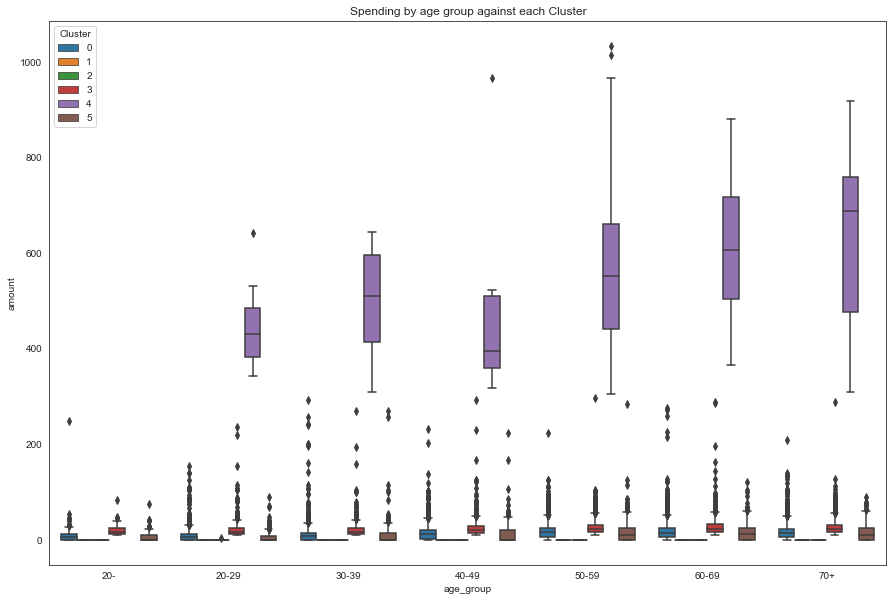

In [294]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.boxplot(x = "age_group", y = "amount", hue = "Cluster", data = k_means_plot_df)
plt.title("Spending by age group against each Cluster")

Cluster 4 captures all the high volume transactions across all age groups and it is clearly separated from the rest of the plot. Need to understand more about the customer purchase pattern and reason to understand if they are bulk corporate of family orders and how frequent these customers make the high volume purchases. Clearly customers over 70+ contributed more high volume transactions than the rest.

This will help create specific campaigns for this focus group to attract more bulk transactions

Text(0.5, 1.0, 'Spending by income group against each Cluster')

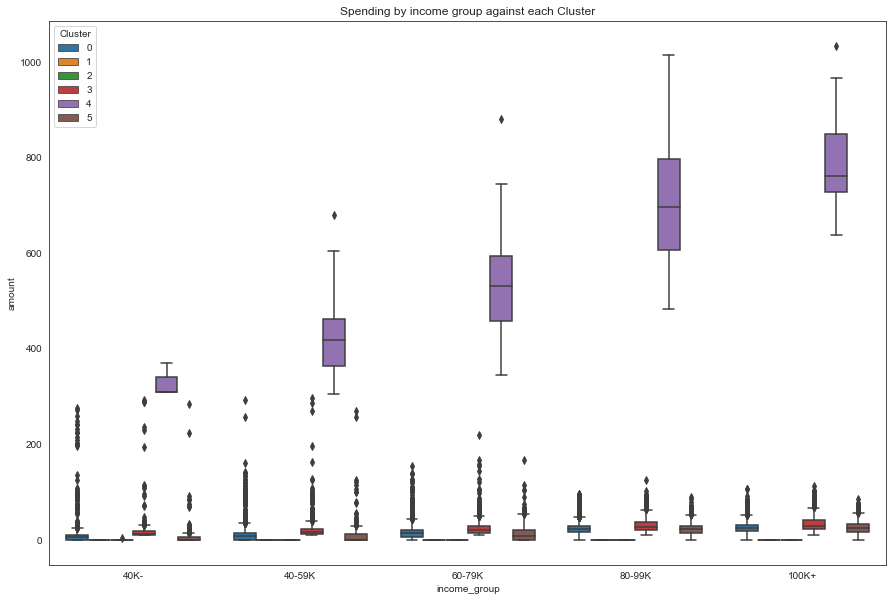

In [295]:
sns.boxplot(x = "income_group", y = "amount", hue = "Cluster", data = k_means_plot_df)
plt.title("Spending by income group against each Cluster")

Customers in the income group of 80-99K contibuted more high volume transactions. Unsuprisingly high income group spent the most.

Text(0.5, 1.0, 'Spending in each Cluster and number of bogo offers')

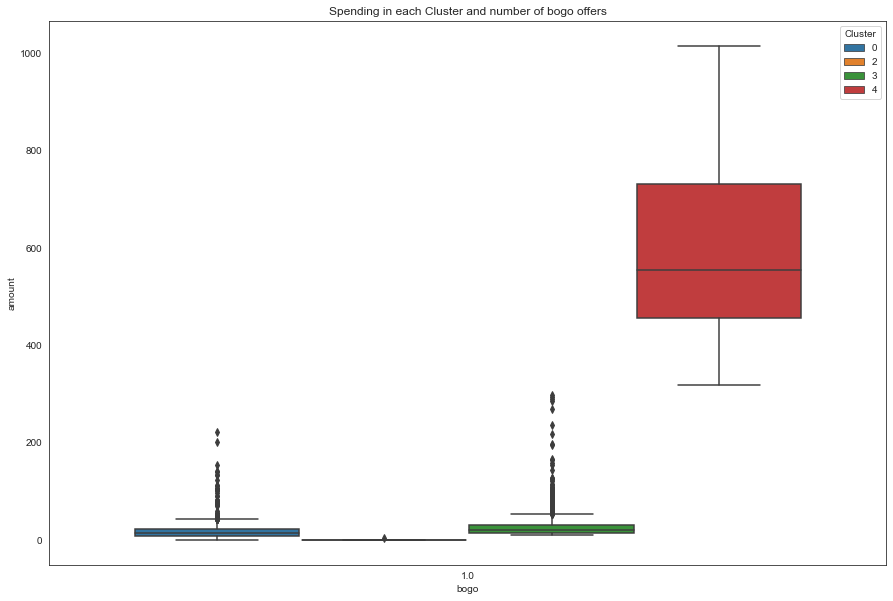

In [296]:
sns.boxplot(x = "bogo", y = "amount",  hue = "Cluster", data = k_means_plot_df[k_means_plot_df['bogo'] == 1])
plt.title("Spending in each Cluster and number of bogo offers")

Text(0.5, 1.0, 'Spending in each Cluster and number of Discount offers')

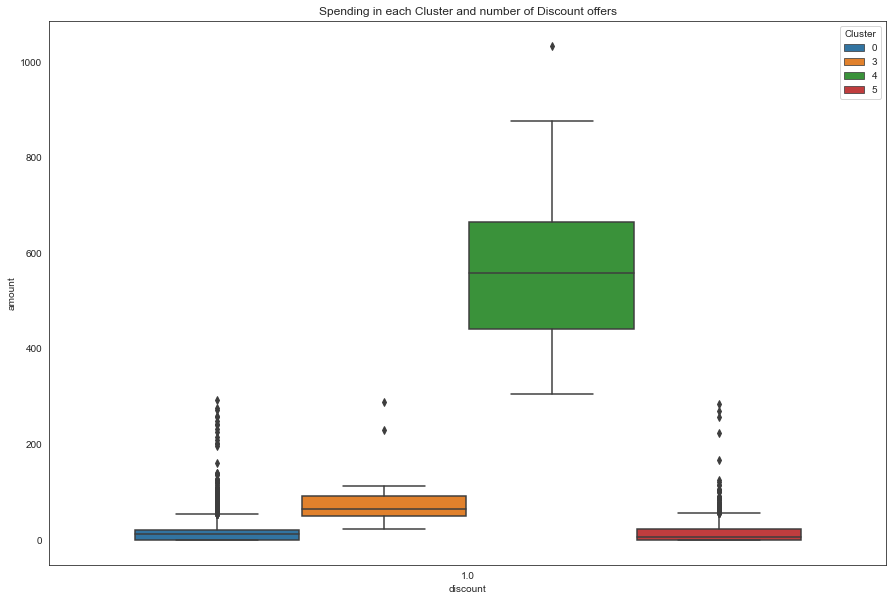

In [297]:
sns.boxplot(x = "discount", y = "amount",  hue = "Cluster", data = k_means_plot_df[k_means_plot_df['discount'] == 1])
plt.title("Spending in each Cluster and number of Discount offers")

Higher mean transaction amount was spent for both Bogo and Discount in the cluster 4.

Text(0.5, 1.0, 'Gender Based Spending in each Cluster ')

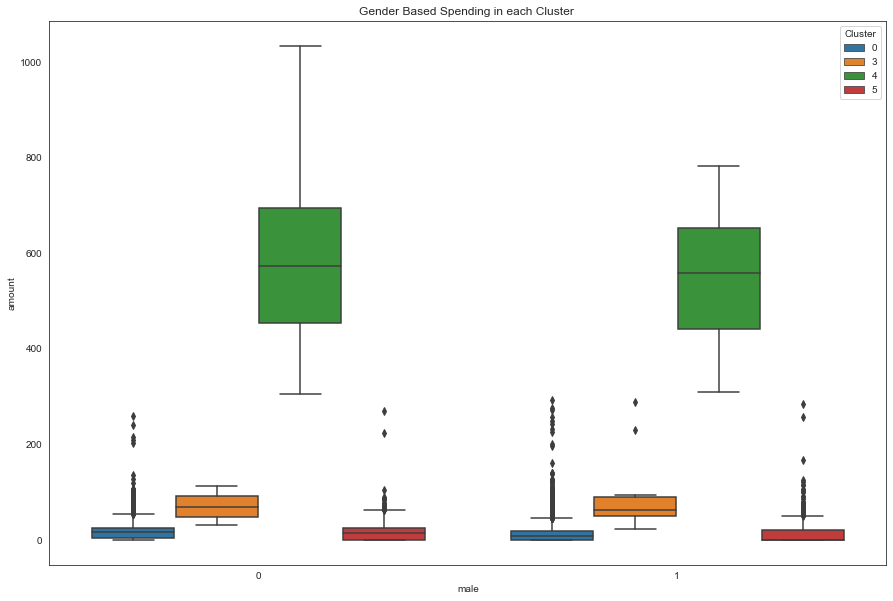

In [299]:
sns.boxplot(x = "male", y = "amount",  hue = "Cluster", data = k_means_plot_df[k_means_plot_df['discount'] == 1])
plt.title("Gender Based Spending in each Cluster ")

Text(0.5, 1.0, 'Income_Group Distribution')

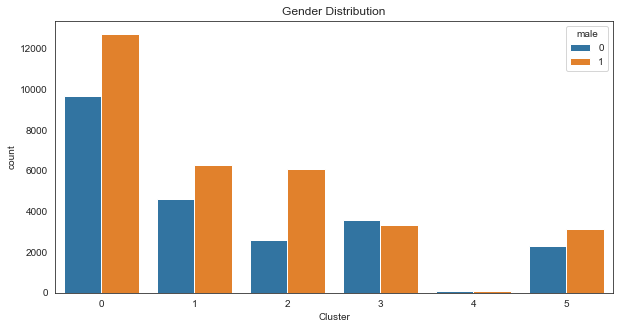

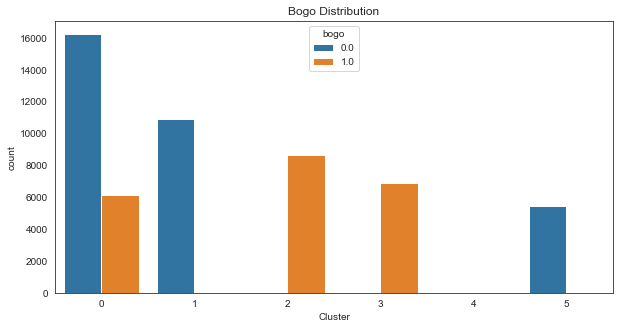

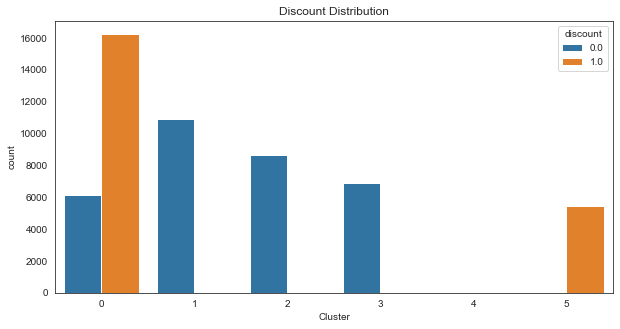

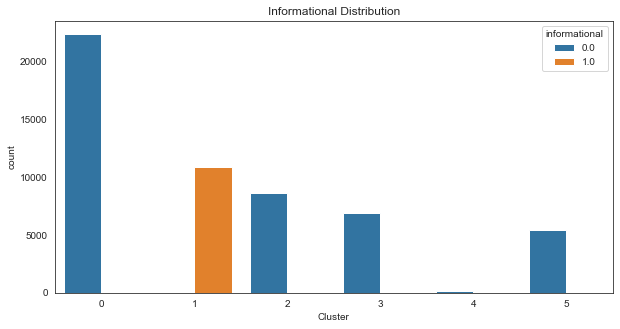

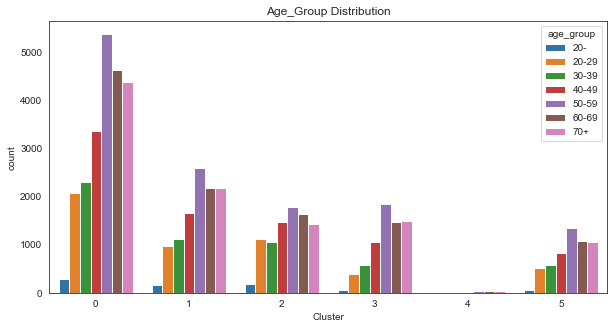

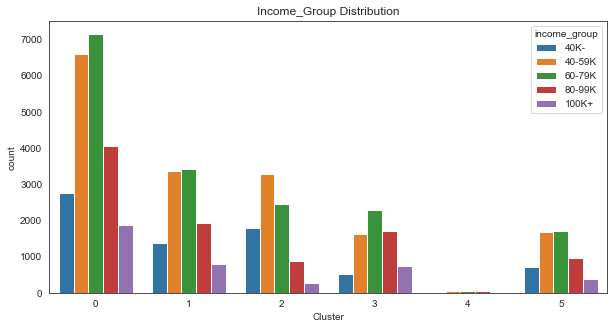

In [293]:
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('Cluster', hue='male', data= k_means_plot_df, ax=ax)
ax.set_title("Gender Distribution")
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('Cluster', hue='bogo', data= k_means_plot_df, ax=ax)
ax.set_title("Bogo Distribution")
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('Cluster', hue='discount', data= k_means_plot_df, ax=ax)
ax.set_title("Discount Distribution")
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('Cluster', hue='informational', data= k_means_plot_df, ax=ax)
ax.set_title("Informational Distribution")
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('Cluster', hue='age_group', data= k_means_plot_df, ax=ax)
ax.set_title("Age_Group Distribution")
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('Cluster', hue='income_group', data= k_means_plot_df, ax=ax)
ax.set_title("Income_Group Distribution")

In [432]:
starbucks_final.groupby('difficulty')['bogo','discount'].sum()

C:\Users\rsure\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


bogo  discount
difficulty                   
0.0             0.0       0.0
5.0         10824.0       0.0
7.0             0.0    5426.0
10.0        10935.0   10879.0
20.0            0.0    5511.0

In [435]:
k_means_plot_df.groupby(['difficulty','Cluster']).agg({'bogo':['sum'],'discount':['sum']})

bogo discount
                       sum      sum
difficulty Cluster                 
0.0        1           0.0      0.0
5.0        0        6160.0      0.0
           2        3656.0      0.0
           3         982.0      0.0
           4          26.0      0.0
7.0        0           0.0   5406.0
           3           0.0      7.0
           4           0.0     13.0
10.0       0           0.0  10842.0
           2        5015.0      0.0
           3        5879.0      0.0
           4          41.0     37.0
20.0       3           0.0     28.0
           4           0.0     26.0
           5           0.0   5457.0

Text(0.5, 1.0, 'Difficulty Distribution')

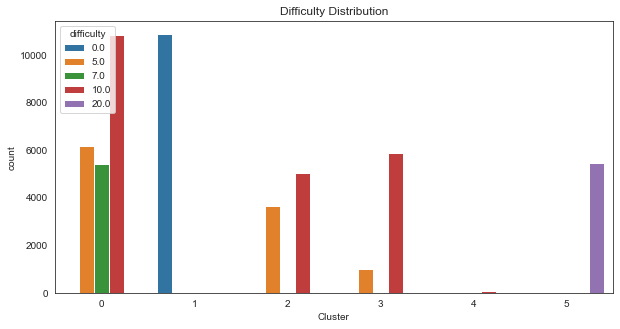

In [429]:
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('Cluster', hue='difficulty', data= k_means_plot_df, ax=ax)
ax.set_title("Difficulty Distribution")

Text(0.5, 1.0, 'Offer Completed Distribution')

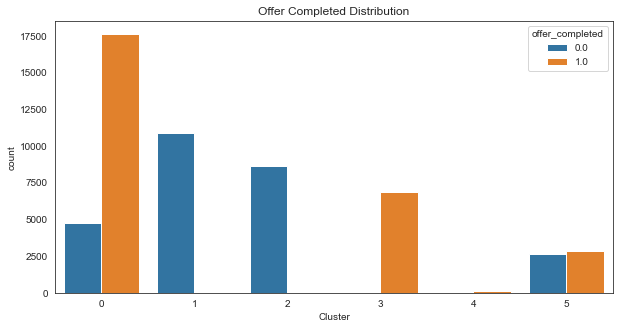

In [306]:
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('Cluster', hue='offer_completed', data= k_means_plot_df, ax=ax)
ax.set_title("Offer Completed Distribution")

Text(0.5, 1.0, 'Offer Viewed Distribution')

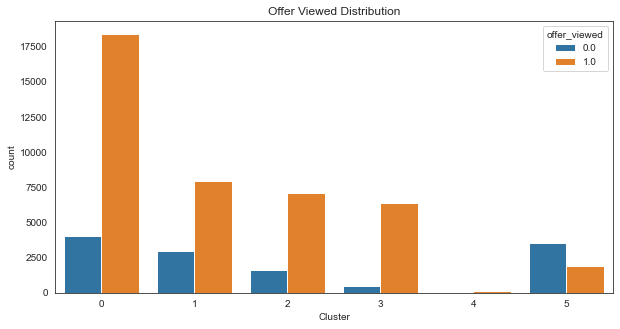

In [305]:
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('Cluster', hue='offer_viewed', data= k_means_plot_df, ax=ax)
ax.set_title("Offer Viewed Distribution")

In [403]:
from IPython.display import display
#figure, axes = plt.subplots(2, 2)
#k_means_plot_df.groupby('Cluster').agg({'amount':['sum']
#                                      ,'male':['sum']
#                                      ,'bogo' : ['sum']
#                                      , 'discount' : ['sum']
#                                      , 'income' : ['mean']
#                                       }).plot.pie(figsize = (15,10),subplots='True',ax=axes[0,0],autopct='%1.1f%%',explode=(0.02,0,0,0,0.1,0),title="Total Expenditure by Cluster")
cluster_split_df = k_means_plot_df.groupby('Cluster').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

cluster_female_df= k_means_plot_df[k_means_plot_df['male'] == 0].groupby('Cluster').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

cluster_male_df= k_means_plot_df[k_means_plot_df['male'] == 1].groupby('Cluster').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

display('Total Aggregated Data by Cluster :',cluster_split_df)
display('Female Aggregated Data by Cluster :',cluster_female_df)
display('Male Aggregated Data by Cluster :',cluster_male_df)


'Total Aggregated Data by Cluster :'

amount           male           bogo           age discount  \
               sum    mean    sum  count     sum  count   mean      sum   
Cluster                                                                   
0        335781.11   14.98  12721  22408  6160.0  22408  54.57  16248.0   
1             0.00    0.00   6277  10878     0.0  10878  54.54      0.0   
2             5.09    0.00   6100   8671  8671.0   8671  51.51      0.0   
3        178979.31   25.95   3323   6896  6861.0   6896  56.75     35.0   
4         83013.99  580.52     69    143    67.0    143  58.48     76.0   
5         68507.21   12.55   3155   5457     0.0   5457  54.35   5457.0   

                  income offer_completed        offer_viewed         
         count      mean             sum  count          sum  count  
Cluster                                                              
0        22408  66346.80         17634.0  22408      18387.0  22408  
1        10878  65464.06             0.0  10878       7906.0  10878  
2         8671  57769.12             1.0   8671       7081.0   8671  
3         6896  71934.45          6896.0   6896       6413.0   6896  
4          143  73818.18           143.0    143        125.0    143  
5         5457  65270.66          2839.0   5457       1923.0   5457

'Female Aggregated Data by Cluster :'

amount         male          bogo          age discount        \
               sum    mean  sum count     sum count   mean      sum count   
Cluster                                                                     
0        172189.39   17.78    0  9687  2933.0  9687  57.48   6754.0  9687   
1             0.00    0.00    0  4601     0.0  4601  57.37      0.0  4601   
2             0.00    0.00    0  2571  2571.0  2571  55.73      0.0  2571   
3         95098.75   26.62    0  3573  3556.0  3573  58.39     17.0  3573   
4         43999.69  594.59    0    74    37.0    74  58.66     37.0    74   
5         36390.52   15.81    0  2302     0.0  2302  57.42   2302.0  2302   

           income offer_completed       offer_viewed        
             mean             sum count          sum count  
Cluster                                                     
0        71888.51          8168.0  9687       8017.0  9687  
1        71342.32             0.0  4601       3378.0  4601  
2        64195.64             0.0  2571       2097.0  2571  
3        74551.92          3573.0  3573       3302.0  3573  
4        76891.89            74.0    74         66.0    74  
5        70606.86          1444.0  2302        870.0  2302

'Male Aggregated Data by Cluster :'

amount           male           bogo           age discount  \
               sum    mean    sum  count     sum  count   mean      sum   
Cluster                                                                   
0        163591.72   12.86  12721  12721  3227.0  12721  52.35   9494.0   
1             0.00    0.00   6277   6277     0.0   6277  52.47      0.0   
2             5.09    0.00   6100   6100  6100.0   6100  49.73      0.0   
3         83880.56   25.24   3323   3323  3305.0   3323  54.99     18.0   
4         39014.30  565.42     69     69    30.0     69  58.29     39.0   
5         32116.69   10.18   3155   3155     0.0   3155  52.11   3155.0   

                  income offer_completed        offer_viewed         
         count      mean             sum  count          sum  count  
Cluster                                                              
0        12721  62126.80          9466.0  12721      10370.0  12721  
1         6277  61155.33             0.0   6277       4528.0   6277  
2         6100  55060.49             1.0   6100       4984.0   6100  
3         3323  69120.07          3323.0   3323       3111.0   3323  
4           69  70521.74            69.0     69         59.0     69  
5         3155  61377.18          1395.0   3155       1053.0   3155

C:\Users\rsure\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<AxesSubplot:ylabel='(amount, sum)'>,
       <AxesSubplot:ylabel='(bogo, sum)'>,
       <AxesSubplot:ylabel='(discount, sum)'>], dtype=object)

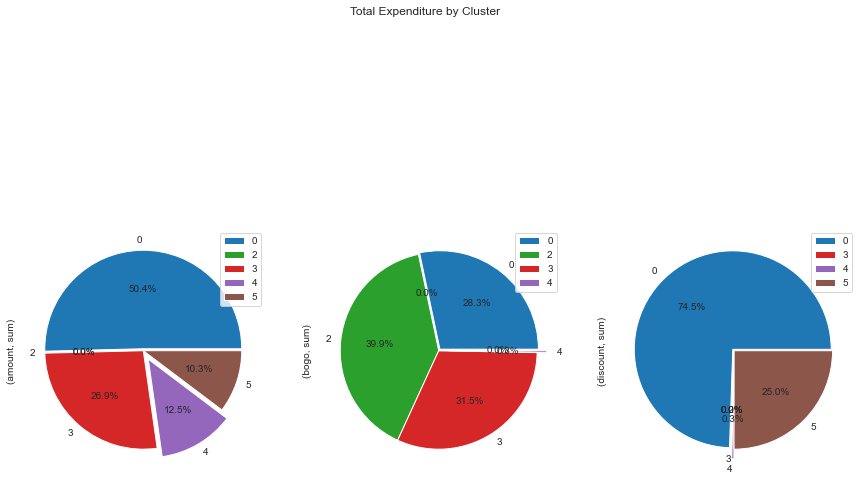

In [426]:
figure, axes = plt.subplots(3, 2)
k_means_plot_df.groupby('Cluster').agg({'amount':['sum']
                                       ,'bogo' : ['sum']
                                       , 'discount' : ['sum']
                                       }).plot.pie(figsize = (15,10),subplots='True',ax=axes[0,0],autopct='%1.1f%%',explode=(0.02,0,0,0,0.1,0),title="Total Expenditure by Cluster")


#### K-means Cluster Analysis results
- Cluster 4        - High Volume Purchases(Avg Transaction of 580 dollars)
- Cluster 1 & 2 - Non-Responsive Customers
- Cluster 5        -  Customers responsive to  highest offer difficulty 
- Cluster 0       -  Customers preferring both BOGO and Discount
- Cluster 3       -  Customers preferring BOGO Over Discount

In [446]:

dbcluster_split_df = k_means_plot_df.groupby('DBSCAN_Cluster').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

dbcluster_female_df= k_means_plot_df[k_means_plot_df['male'] == 0].groupby('DBSCAN_Cluster').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

dbcluster_male_df= k_means_plot_df[k_means_plot_df['male'] == 1].groupby('DBSCAN_Cluster').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

#k_means_plot_df.groupby('Cluster').agg({'male':['sum']}).plot.pie(figsize = (10,8),subplots='True',ax=axes[0,1],autopct='%1.1f%%',explode=(0.02,0,0,0,0.1,0),title="Total Male Population by Cluster")


display('Female Aggregated Data by Cluster :',dbcluster_female_df)
display('Male Aggregated Data by Cluster :',dbcluster_male_df)
display('Total Aggregated Data by Cluster :',dbcluster_split_df)

'Female Aggregated Data by Cluster :'

amount         male          bogo          age discount  \
                      sum    mean  sum count     sum count   mean      sum   
DBSCAN_Cluster                                                               
-1               62013.90  187.35    0   331   168.0   331  58.84    163.0   
 0              112634.87   16.89    0  6668     0.0  6668  57.37   6668.0   
 1               52446.17   18.40    0  2850  2850.0  2850  57.41      0.0   
 2                   0.00    0.00    0  1178  1178.0  1178  56.30      0.0   
 3               15588.61   36.85    0   423   423.0   423  57.70      0.0   
 4               26631.85   21.46    0  1241     0.0  1241  58.77   1241.0   
 5                   0.00    0.00    0   856     0.0   856  55.26    856.0   
 6                8377.21   46.03    0   182     0.0   182  58.68    182.0   
 7                   0.00    0.00    0  4601     0.0  4601  57.37      0.0   
 8                   0.00    0.00    0  1463  1463.0  1463  55.90      0.0   
 9               17169.48   41.17    0   417   417.0   417  58.41      0.0   
 10              52816.26   20.33    0  2598  2598.0  2598  58.46      0.0   

                        income offer_completed       offer_viewed        
               count      mean             sum count          sum count  
DBSCAN_Cluster                                                           
-1               331  73438.07           318.0   331        287.0   331  
 0              6668  71343.58          5230.0  6668       5628.0  6668  
 1              2850  72255.44          2850.0  2850       2278.0  2850  
 2              1178  67565.37             0.0  1178        803.0  1178  
 3               423  72631.21           423.0   423        376.0   423  
 4              1241  74249.80          1241.0  1241        535.0  1241  
 5               856  64163.55             0.0   856        214.0   856  
 6               182  77769.23           182.0   182        110.0   182  
 7              4601  71342.32             0.0  4601       3378.0  4601  
 8              1463  63630.21             0.0  1463       1322.0  1463  
 9               417  75124.70           417.0   417        410.0   417  
 10             2598  74719.78          2598.0  2598       2389.0  2598

'Male Aggregated Data by Cluster :'

amount          male          bogo          age discount  \
                      sum    mean   sum count     sum count   mean      sum   
DBSCAN_Cluster                                                                
-1               65331.97  148.82   439   439   218.0   439  55.06    221.0   
 0              104043.58   11.11  9365  9365     0.0  9365  51.98   9365.0   
 1               47323.63   14.90  3176  3176  3176.0  3176  53.16      0.0   
 2                   0.00    0.00  2571  2571  2571.0  2571  50.67      0.0   
 3               14131.90   32.79   431   431   431.0   431  54.58      0.0   
 4               23109.74   19.19  1204  1204     0.0  1204  54.67   1204.0   
 5                   0.00    0.00  1757  1757     0.0  1757  50.26   1757.0   
 6                6395.97   40.23   159   159     0.0   159  52.60    159.0   
 7                   0.00    0.00  6277  6277     0.0  6277  52.47      0.0   
 8                   0.00    0.00  3548  3548  3548.0  3548  49.19      0.0   
 9               12989.05   38.20   340   340   340.0   340  54.63      0.0   
 10              45282.52   19.04  2378  2378  2378.0  2378  55.19      0.0   

                        income offer_completed       offer_viewed        
               count      mean             sum count          sum count  
DBSCAN_Cluster                                                           
-1               439  61334.85           414.0   439        377.0   439  
 0              9365  61311.80          6152.0  9365       7674.0  9365  
 1              3176  64478.59          3176.0  3176       2550.0  3176  
 2              2571  56067.29             0.0  2571       1647.0  2571  
 3               431  66218.10           431.0   431        397.0   431  
 4              1204  69717.61          1204.0  1204        598.0  1204  
 5              1757  55024.47             0.0  1757        327.0  1757  
 6               159  68710.69           159.0   159        116.0   159  
 7              6277  61155.33             0.0  6277       4528.0  6277  
 8              3548  54662.34             0.0  3548       3344.0  3548  
 9               340  70285.29           340.0   340        340.0   340  
 10             2378  69981.08          2378.0  2378       2207.0  2378

'Total Aggregated Data by Cluster :'

amount          male           bogo           age discount  \
                      sum    mean   sum  count     sum  count   mean      sum   
DBSCAN_Cluster                                                                  
-1              127345.87  165.38   439    770   386.0    770  56.69    384.0   
 0              216678.45   13.51  9365  16033     0.0  16033  54.22  16033.0   
 1               99769.80   16.56  3176   6026  6026.0   6026  55.17      0.0   
 2                   0.00    0.00  2571   3749  3749.0   3749  52.44      0.0   
 3               29720.51   34.80   431    854   854.0    854  56.12      0.0   
 4               49741.59   20.34  1204   2445     0.0   2445  56.75   2445.0   
 5                   0.00    0.00  1757   2613     0.0   2613  51.90   2613.0   
 6               14773.18   43.32   159    341     0.0    341  55.85    341.0   
 7                   0.00    0.00  6277  10878     0.0  10878  54.54      0.0   
 8                   0.00    0.00  3548   5011  5011.0   5011  51.15      0.0   
 9               30158.53   39.84   340    757   757.0    757  56.71      0.0   
 10              98098.78   19.71  2378   4976  4976.0   4976  56.90      0.0   

                         income offer_completed        offer_viewed         
                count      mean             sum  count          sum  count  
DBSCAN_Cluster                                                              
-1                770  66537.66           732.0    770        664.0    770  
 0              16033  65483.94         11382.0  16033      13302.0  16033  
 1               6026  68156.65          6026.0   6026       4828.0   6026  
 2               3749  59680.18             0.0   3749       2450.0   3749  
 3                854  69394.61           854.0    854        773.0    854  
 4               2445  72018.00          2445.0   2445       1133.0   2445  
 5               2613  58018.37             0.0   2613        541.0   2613  
 6                341  73545.45           341.0    341        226.0    341  
 7              10878  65464.06             0.0  10878       7906.0  10878  
 8               5011  57280.58             0.0   5011       4666.0   5011  
 9                757  72951.12           757.0    757        750.0    757  
 10              4976  72455.18          4976.0   4976       4596.0   4976

Text(0.5, 1.0, 'Difficulty Distribution')

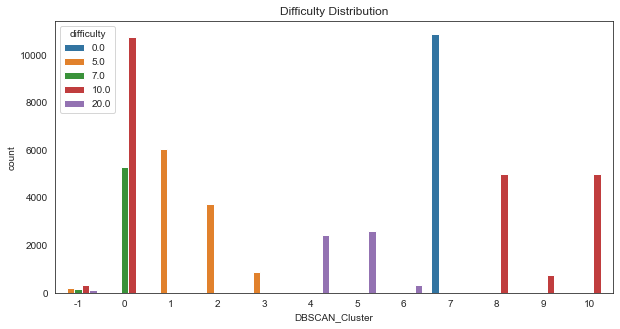

In [447]:
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('DBSCAN_Cluster', hue='difficulty', data= k_means_plot_df, ax=ax)
ax.set_title("Difficulty Distribution")

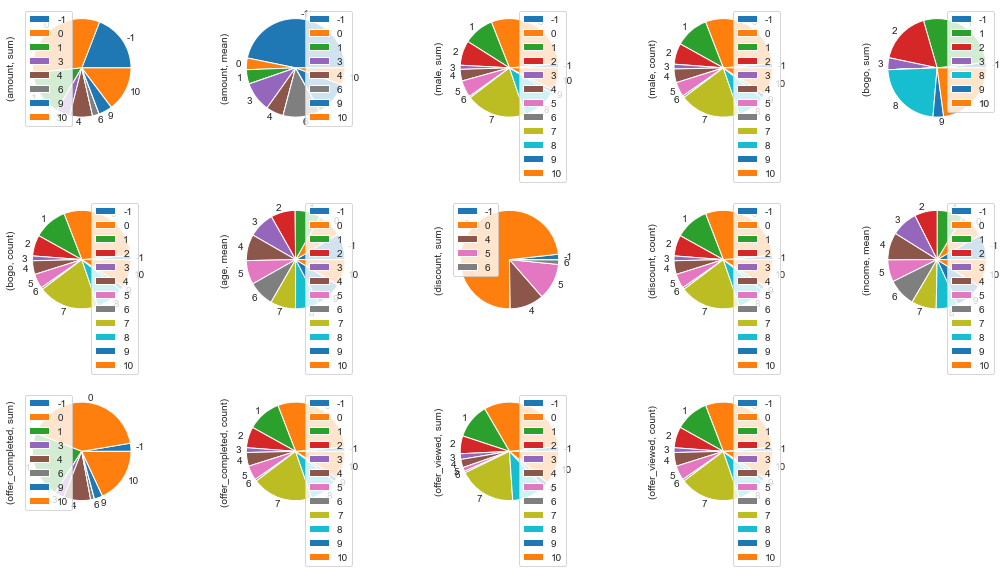

In [422]:
#fig, axes = plt.subplots(nrows=, ncols=3)
dbcluster_split_df.plot.pie(subplots=True, layout=(4,5))

plt.tight_layout()
plt.show()

C:\Users\rsure\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<AxesSubplot:ylabel='(amount, sum)'>,
       <AxesSubplot:ylabel='(bogo, sum)'>,
       <AxesSubplot:ylabel='(discount, sum)'>], dtype=object)

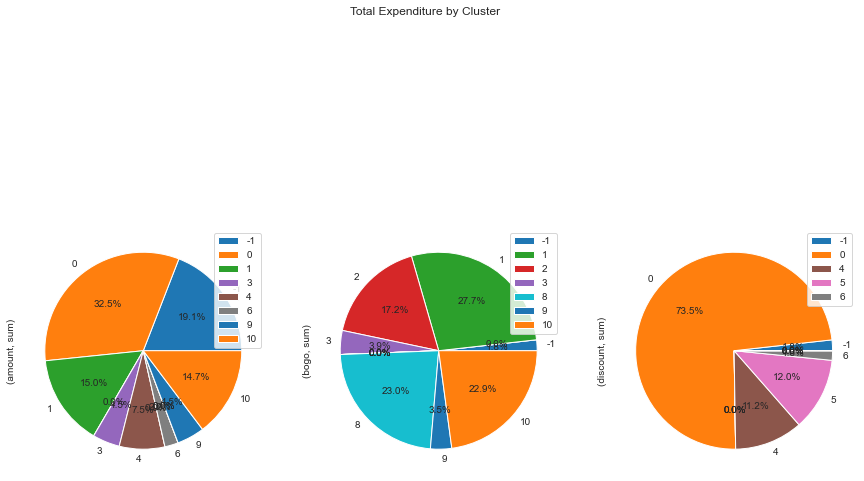

In [445]:
figure, axes = plt.subplots(3, 2)
k_means_plot_df.groupby('DBSCAN_Cluster').agg({'amount':['sum']
                                       ,'bogo' : ['sum']
                                       , 'discount' : ['sum']
                                       }).plot.pie(figsize = (15,10),subplots='True',ax=axes[0,0],autopct='%1.1f%%',title="Total Expenditure by Cluster")



#### DBSCAN Cluster Analysis results
- Cluster 2,5,7,8   - Non-Responsive Customers
- Cluster 0         - Customers Responsive to Discounts(Difficulty 7,10) and not to BOGO 
- Cluster 1,3       - Customers Responsive to BOGO(difficulty 5) and not Discounts
- Cluster 4         - Customers responsive to  highest offer difficulty 
- Cluster 6         - Customers purchased without viewing the offer
- Cluster 9         - Customers Responsive to BOGO(difficulty 10) and not Discounts

- High Volume Purchases are captured as noise

In [405]:

h3cluster_split_df = k_means_plot_df.groupby('Hier_Agg_Cluster').agg({'amount':['sum','mean']
                                      , 'male':['sum','count']
                                      , 'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

h3cluster_female_df= k_means_plot_df[k_means_plot_df['male'] == 0].groupby('Hier_Agg_Cluster').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

h3cluster_male_df= k_means_plot_df[k_means_plot_df['male'] == 1].groupby('Hier_Agg_Cluster').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

#k_means_plot_df.groupby('Cluster').agg({'male':['sum']}).plot.pie(figsize = (10,8),subplots='True',ax=axes[0,1],autopct='%1.1f%%',explode=(0.02,0,0,0,0.1,0),title="Total Male Population by Cluster")
display('Total Aggregated Data by Cluster :',h3cluster_split_df)
display('Female Aggregated Data by Cluster :',h3cluster_female_df)
display('Male Aggregated Data by Cluster :',h3cluster_male_df)


'Total Aggregated Data by Cluster :'

amount          male            bogo           age  \
                        sum   mean    sum  count      sum  count   mean   
Hier_Agg_Cluster                                                          
0                 301951.99   9.89  18803  30523   8806.0  30523  53.55   
1                      0.00   0.00   6277  10878      0.0  10878  54.54   
2                 364334.72  27.91   6565  13052  12953.0  13052  56.02   

                 discount           income offer_completed         \
                      sum  count      mean             sum  count   
Hier_Agg_Cluster                                                    
0                 21717.0  30523  63389.38         14461.0  30523   
1                     0.0  10878  65464.06             0.0  10878   
2                    99.0  13052  70148.56         13052.0  13052   

                 offer_viewed         
                          sum  count  
Hier_Agg_Cluster                      
0                     22576.0  30523  
1                      7906.0  10878  
2                     11353.0  13052

'Female Aggregated Data by Cluster :'

amount        male           bogo           age discount  \
                        sum   mean  sum  count     sum  count   mean      sum   
Hier_Agg_Cluster                                                                
0                 155595.63  13.28    0  11720  2654.0  11720  57.11   9066.0   
1                      0.00   0.00    0   4601     0.0   4601  57.37      0.0   
2                 192082.72  29.61    0   6487  6443.0   6487  57.96     44.0   

                           income offer_completed        offer_viewed         
                  count      mean             sum  count          sum  count  
Hier_Agg_Cluster                                                              
0                 11720  69892.58          6772.0  11720       8715.0  11720  
1                  4601  71342.32             0.0   4601       3378.0   4601  
2                  6487  73514.88          6487.0   6487       5637.0   6487

'Male Aggregated Data by Cluster :'

amount          male           bogo           age  \
                        sum   mean    sum  count     sum  count   mean   
Hier_Agg_Cluster                                                         
0                 146356.36   7.78  18803  18803  6152.0  18803  51.34   
1                      0.00   0.00   6277   6277     0.0   6277  52.47   
2                 172252.00  26.24   6565   6565  6510.0   6565  54.10   

                 discount           income offer_completed         \
                      sum  count      mean             sum  count   
Hier_Agg_Cluster                                                    
0                 12651.0  18803  59335.90          7689.0  18803   
1                     0.0   6277  61155.33             0.0   6277   
2                    55.0   6565  66822.24          6565.0   6565   

                 offer_viewed         
                          sum  count  
Hier_Agg_Cluster                      
0                     13861.0  18803  
1                      4528.0   6277  
2                      5716.0   6565

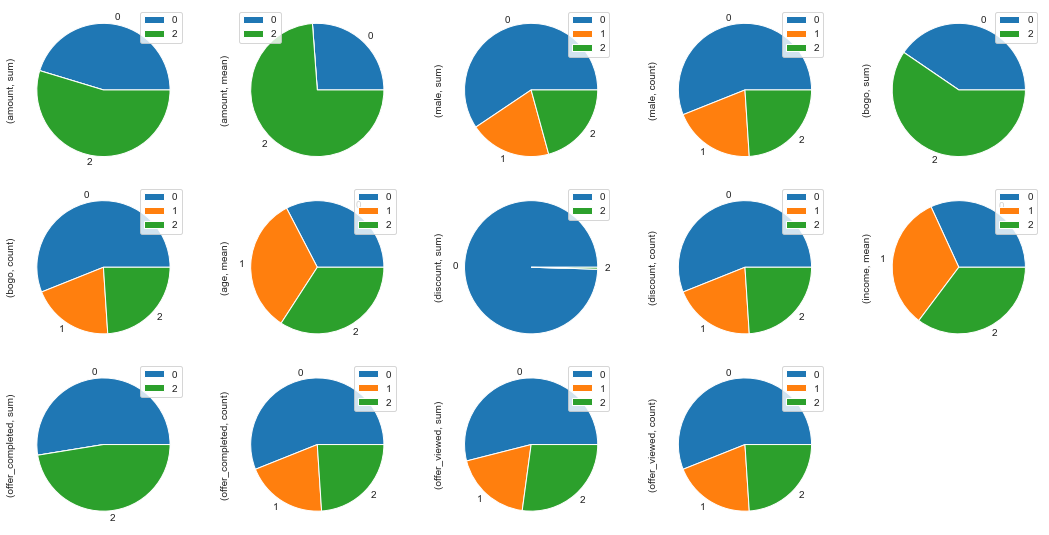

In [411]:
h3cluster_split_df.plot.pie(subplots=True, layout=(4,5))

plt.tight_layout()
plt.show()

In [406]:

h6cluster_split_df = k_means_plot_df.groupby('Hier_Agg_Cluster_6').agg({'amount':['sum','mean']
                                      , 'male':['sum','count']
                                      , 'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

h6cluster_female_df= k_means_plot_df[k_means_plot_df['male'] == 0].groupby('Hier_Agg_Cluster_6').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

h6cluster_male_df= k_means_plot_df[k_means_plot_df['male'] == 1].groupby('Hier_Agg_Cluster_6').agg({'amount':['sum','mean']
                                      ,'male':['sum','count']
                                      ,'bogo' : ['sum','count']
                                      , 'age' : ['mean']
                                      , 'discount' : ['sum','count']
                                      , 'income' : ['mean']
                                      , 'offer_completed' : ['sum','count']
                                      , 'offer_viewed' : ['sum','count']
                                       }).round(2)

#k_means_plot_df.groupby('Cluster').agg({'male':['sum']}).plot.pie(figsize = (10,8),subplots='True',ax=axes[0,1],autopct='%1.1f%%',explode=(0.02,0,0,0,0.1,0),title="Total Male Population by Cluster")
display('Total Aggregated Data by Cluster :',h6cluster_split_df)
display('Female Aggregated Data by Cluster :',h6cluster_female_df)
display('Male Aggregated Data by Cluster :',h6cluster_male_df)


'Total Aggregated Data by Cluster :'

amount          male            bogo           age  \
                          sum    mean   sum  count      sum  count   mean   
Hier_Agg_Cluster_6                                                          
0                   273321.82   21.23  6477  12876  12874.0  12876  56.01   
1                        0.00    0.00  6277  10878      0.0  10878  54.54   
2                   234658.78   14.41  9525  16287     35.0  16287  54.25   
3                        0.00    0.00  6128   8776   8771.0   8776  51.73   
4                    91012.90  517.12    88    176     79.0    176  56.56   
5                    67293.21   12.32  3150   5460      0.0   5460  54.42   

                   discount           income offer_completed         \
                        sum  count      mean             sum  count   
Hier_Agg_Cluster_6                                                    
0                       2.0  12876  70189.89         12876.0  12876   
1                       0.0  10878  65464.06             0.0  10878   
2                   16252.0  16287  65425.25         11619.0  16287   
3                       5.0   8776  58362.47             0.0   8776   
4                      97.0    176  67125.00           176.0    176   
5                    5460.0   5460  65396.34          2842.0   5460   

                   offer_viewed         
                            sum  count  
Hier_Agg_Cluster_6                      
0                       11202.0  12876  
1                        7906.0  10878  
2                       13508.0  16287  
3                        7127.0   8776  
4                         151.0    176  
5                        1941.0   5460

'Female Aggregated Data by Cluster :'

amount         male          bogo          age  \
                          sum    mean  sum count     sum count   mean   
Hier_Agg_Cluster_6                                                      
0                   144714.52   22.62    0  6399  6399.0  6399  57.96   
1                        0.00    0.00    0  4601     0.0  4601  57.37   
2                   119085.53   17.61    0  6762     7.0  6762  57.37   
3                        0.00    0.00    0  2648  2647.0  2648  56.12   
4                    47368.20  538.27    0    88    44.0    88  57.69   
5                    36510.10   15.81    0  2310     0.0  2310  57.49   

                   discount          income offer_completed        \
                        sum count      mean             sum count   
Hier_Agg_Cluster_6                                                  
0                       0.0  6399  73550.55          6399.0  6399   
1                       0.0  4601  71342.32             0.0  4601   
2                    6755.0  6762  71340.73          5320.0  6762   
3                       1.0  2648  65462.99             0.0  2648   
4                      44.0    88  70920.45            88.0    88   
5                    2310.0  2310  70731.17          1452.0  2310   

                   offer_viewed        
                            sum count  
Hier_Agg_Cluster_6                     
0                        5560.0  6399  
1                        3378.0  4601  
2                        5705.0  6762  
3                        2129.0  2648  
4                          77.0    88  
5                         881.0  2310

'Male Aggregated Data by Cluster :'

amount          male          bogo          age  \
                          sum    mean   sum count     sum count   mean   
Hier_Agg_Cluster_6                                                       
0                   128607.30   19.86  6477  6477  6475.0  6477  54.08   
1                        0.00    0.00  6277  6277     0.0  6277  52.47   
2                   115573.25   12.13  9525  9525    28.0  9525  52.03   
3                        0.00    0.00  6128  6128  6124.0  6128  49.83   
4                    43644.70  495.96    88    88    35.0    88  55.43   
5                    30783.11    9.77  3150  3150     0.0  3150  52.17   

                   discount          income offer_completed        \
                        sum count      mean             sum count   
Hier_Agg_Cluster_6                                                  
0                       2.0  6477  66869.69          6477.0  6477   
1                       0.0  6277  61155.33             0.0  6277   
2                    9497.0  9525  61225.72          6299.0  9525   
3                       4.0  6128  55294.22             0.0  6128   
4                      53.0    88  63329.55            88.0    88   
5                    3150.0  3150  61484.13          1390.0  3150   

                   offer_viewed        
                            sum count  
Hier_Agg_Cluster_6                     
0                        5642.0  6477  
1                        4528.0  6277  
2                        7803.0  9525  
3                        4998.0  6128  
4                          74.0    88  
5                        1060.0  3150

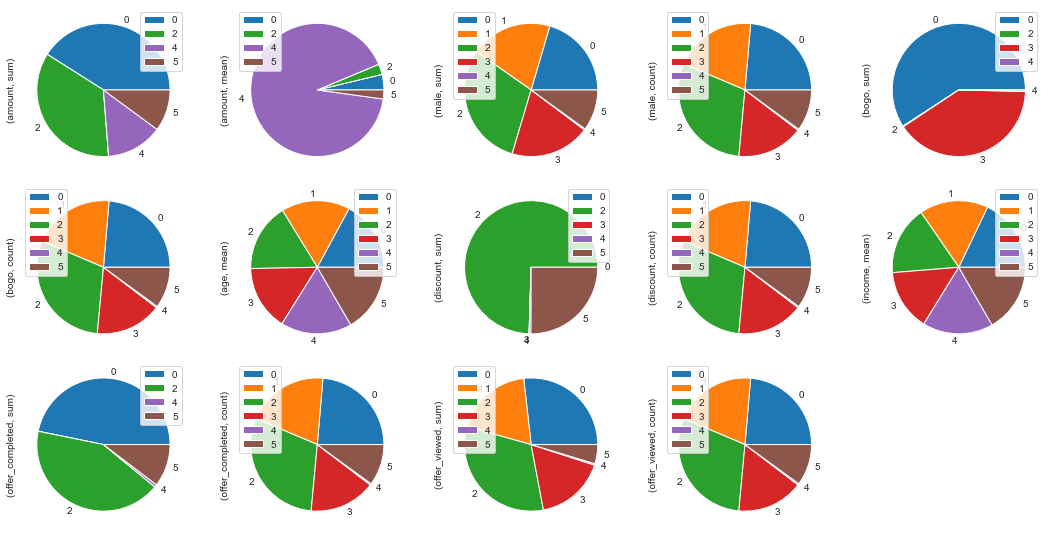

In [410]:
h6cluster_split_df.plot.pie(subplots=True, layout=(4,5))

plt.tight_layout()
plt.show()

#### Hierarchical Cluster Analysis results
- Cluster 4        - High Volume Purchases(Avg Transaction of 495 dollars)
- Cluster 1 & 3    - Non-Responsive Customers
- Cluster 5        -  Customers responsive to  highest offer difficulty Discount offer
- Cluster 0        -  Customers preferring BOGO Over Discount
- Cluster 2        -  Customers preferring both BOGO and Discount

**Conclusion:** - With the Comprehensive Unsupervized models, comparison and analysis - we prefer DBSCAN over K-means and Hierarchical due to much clear segregation of the customer profiles over other eventhough high profile customers are captured as noise , it would be interesting to analysis more on thier profiles, historical transaction and purpose reason will help to understand more and conclude if they are true noise.

Starbucks to continue/review Marketing strategies for responsive customers and review and make up with better marketing strategies for customers, who are not that respective to the offers.